<a href="https://colab.research.google.com/github/suwatoh/Python-learning/blob/main/204_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas
======

pandas の概要
-------------

[pandas](https://pandas.pydata.org/) は、 NumPy の上に構築された、表形式（2 次元）のデータを操作するための高水準なインターフェースを提供するサードパティ製ライブラリである。ライセンスは BSD 3-Clause License。インストール方法は次のとおり。

``` shell
pip install pandas
```

欠損値
------

`pandas` において、以下のオブジェクトは**欠損値**（missing value）として扱われる。

  * `None`
  * `float('nan')`
  * `math.nan`
  * `numpy.nan`

また、 `pandas.NA` と `pandas.NaT` が欠損値を示すオブジェクトとして提供されている。 `pandas.NA` は Not Available を表し、`pandas.NaT` は Not a Time（`numpy.datetime64`、 `numpy.timedelta64` 用）を表すとされる。ただし、 `pandas.NA` の扱いはまだ実験的とされている。

欠損値は、標準出力やファイルには `NaN` と表記される。

DataFrame と Series
-------------------

`pandas.DataFrame` は、以下のような構成の表形式のデータを表現するデータ型である。

``` text

      ┏━━━━━━━━━━━━━━━━┓
      ┃ 名前 │ 年齢 │ 住所 │ 血液型 ┃◀ columns（列のラベル）
      ┗━━━━━━━━━━━━━━━━┛
┏━┓┏━━━━━━━━━━━━━━━━┓
┃ 0┃┃ 佐藤 │  12  │大阪府│ Ａ型   ┃
┃─┃┃───┼───┼───┼────┃
┃ 1┃┃ 鈴木 │  23  │東京都│ ＡＢ型 ┃
┃─┃┃───┼───┼───┼────┃◀ values（データ本体）
┃ 2┃┃ 斎藤 │  34  │愛知県│ Ｂ型   ┃
┃─┃┃───┼───┼───┼────┃
┃ 3┃┃ 小林 │  45  │福岡県│ Ｏ型   ┃
┗━┛┗━━━━━━━━━━━━━━━━┛
  ▲
index（行のラベル）
```

`pandas.Series` は、以下のような構成の 1 次元のデータを表現するデータ型である。

``` text
┏━┓┏━━━┓
┃ 0┃┃ 佐藤 ┃
┃─┃┃───┃
┃ 1┃┃ 鈴木 ┃
┃─┃┃───┃◀ values（データ本体）
┃ 2┃┃ 斎藤 ┃
┃─┃┃───┃
┃ 3┃┃ 小林 ┃
┗━┛┗━━━┛
  ▲
index（データのラベル）
```

`pandas.DataFrame` の主な属性は次のとおり。

| 属性 | 意味 |
|:---|:---|
| `DataFrame.values` | （読み取り専用）データ本体を構成する `numpy.ndarray` オブジェクトを返す |
| `DataFrame.index` | 行のラベルを構成するインデックスオブジェクトを返す。`DataFrame.index` の値はイテラブルで上書きが可能 |
| `DataFrame.columns` | 列のラベルを構成するインデックスオブジェクトを返す。`DataFrame.columns` の値はイテラブルで上書きが可能 |
| `DataFrame.dtypes` | このオブジェクトの列のラベルが `index` となり、各列の `numpy.dtype` が `values` となる `pandas.Series` オブジェクトを返す |
| `DataFrame.shape` | 行数と列数のタプル `(行数, 列数)` を返す |
| `DataFrame.size` | 全要素数を返す。これは `行数 * 列数` の値に等しい |

インデックスオブジェクトは、以下のクラスのインスタンスである。

| クラス | 意味 |
|:---|:---|
| `pandas.Index` | 基本的なインデックス |
| `pandas.RangeIndex` | 自動的に割り振られる数字によるインデックス |
| `pandas.DatetimeIndex` | 日時を表現するインデックス |
| `pandas.TimedeltaIndex` | 時間差を表現するインデックス |
| `pandas.PeriodIndex` |  特定の期間を表現するインデックス |
| `pandas.CategoricalIndex` | カテゴリカルデータを表現するインデックス |
| `pandas.IntervalIndex` | 数値範囲（区間）を表現するインデックス |
| `pandas.MultiIndex` | 階層を持つインデックスを表す |

インデックスオブジェクトのインデクス参照により個々のラベルにアクセス可能であるが、個々のラベルを書き換えることはできない。

`pandas.DataFrame` の `info()` メソッドで、行数・列数や全体のメモリ使用量、各列のデータ型や欠損値ではない要素の数などの情報を標準出力に出力することができる。

組み込み関数 `len()` 関数を使って、 `pandas.DataFrame` の行数を `len(df)` で取得でき、列数を `len(df.columns)` で取得できる。

`pandas.Series` も `values`、 `index`、 `shape`、 `size` 属性を持つ。 `len()` 関数を使って全要素数を取得できる。また、固有の属性として以下の属性も持つ。

| 属性 | 意味 |
|:---|:---|
| `Series.name` | `pandas.DataFrame` の列のラベルに相当する |
| `Series.hasnans` | 欠損値がある場合は `True` を返す |

`pandas.DataFrame` と `pandas.Series` は、 `to_numpy()` メソッドがデータ本体を構成する `numpy.ndarray` オブジェクトを返す。[公式ドキュメント](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html#pandas.DataFrame.values)は、 `values` 属性の代わりに `to_numpy()` メソッドの使用を推奨している。

``` python
DataFrame.to_numpy(dtype=None, copy=False, na_value=<no_default>)
Series.to_numpy(dtype=None, copy=False, na_value=<no_default>, **kwargs)
```

| 引数 | 意味 |
|:---|:---|
| `dtype` | `numpy.ndarray` の dtype を指定する。要素が変換できない型を指定するとエラーになる。省略した場合、型変換できる共通の dtype が選ばれる。型変換できる共通の型が無い場合、<br />`object` が選ばれる |
| `copy` | `True` の場合、メソッドは常に `numpy.ndarray` オブジェクトのコピーを返す。デフォルトではできる限りビューを返す（型変換によりコピーが返されることもある） |
| `na_value` | 欠損値に使用する値を指定できる。デフォルト値は、`dtype` 属性と列の dtype によって異なる |

なお、Colab 上では、 `pandas.DataFrame` オブジェクトや `pandas.Series` オブジェクトを整形して出力する関数 `display()` が利用できる。裸のオブジェクトには自動的に `display()` が適用されて出力が行われる。

DataFrame オブジェクトの作成
----------------------------

### コンストラクタ ###

`pandas.DataFrame` のコンストラクタは次のとおり。

``` python
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
```

| 引数 | 意味 |
|:---|:---|
| `data` | `values`（データ本体）となる 2 次元の配列（`numpy.ndarray` オブジェクト）や array-like オブジェクト、辞書、辞書を返すイテラブルなどを指定する |
| `index` | `index`（行のラベル）となる array-like オブジェクトを指定する。文字列でもよく、また重複していてもよい。省略した場合、`index` は `0` からの連番の数値となる |
| `columns` | `columns`（列のラベル）となる array-like オブジェクトを指定する。省略した場合、`index` は `0` からの連番の数値となる |
| `dtype` | `values` の列の dtype を指定する。省略した場合、各列の dtype は自動的に選択される |
| `copy` | `data` のコピーを使うかどうかをブール値で指定する。省略した場合、`values` が配列なら `copy=False` のように動作し、`values` が辞書なら `copy=True` のように動作する |

In [ ]:
# 2 次元配列から生成
import pandas as pd
import numpy as np
pd.DataFrame(np.arange(9).reshape(3, 3))

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


行や列のラベルは、ハッシュ可能なオブジェクトを指定できる。例えば、数値、文字列、タプル、 `datetime`。必ずしもデータ型を統一する必要はない。

In [ ]:
# 入れ子のリストから生成
import pandas as pd
pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
              ["鈴木", 23, "東京都", "ＡＢ型"],
              ["斎藤", 34, "愛知県", "Ｂ型"],
              ["小林", 45, "福岡県", "Ｏ型"]],
             columns=["名前", "年齢", "住所", "血液型"])

,名前,年齢,住所,血液型
0,佐藤,12,大阪府,Ａ型
1,鈴木,23,東京都,ＡＢ型
2,斎藤,34,愛知県,Ｂ型
3,小林,45,福岡県,Ｏ型


`data` に 2 次元の配列や array-like オブジェクトを指定する場合、列のサイズが一致していないなら足りない部分が欠損値 NaN となる。

`data` に辞書を指定する場合、キーは列のラベルとなり、値は列のデータとなる。値は、スカラーのシーケンスか 1 次元配列にするか、辞書にする必要がある。値を辞書とするなら、キーは行のラベルとなる。サイズが異なるとエラーとなる（欠損値 NaN とはならない）。

In [ ]:
# 辞書から作成
import pandas as pd
pd.DataFrame({"名前": ["佐藤", "鈴木", "斎藤", "小林"],
              "年齢": [12, 23, 34, 45],
              "住所": ["大阪府", "東京都", "愛知県", "福岡県"],
              "血液型": ["Ａ型", "ＡＢ型", "Ｂ型", "Ｏ型"]},
             index=["row_0", "row_1", "row_2", "row_3"])

,名前,年齢,住所,血液型
row_0,佐藤,12,大阪府,Ａ型
row_1,鈴木,23,東京都,ＡＢ型
row_2,斎藤,34,愛知県,Ｂ型
row_3,小林,45,福岡県,Ｏ型


In [ ]:
# 辞書から作成
import pandas as pd
pd.DataFrame({"名前": {"row_0": "佐藤", "row_1": "鈴木", "row_2": "斎藤", "row_3": "小林"},
              "年齢": {"row_0": 12, "row_1": 23, "row_2": 34, "row_3": 45},
              "住所": {"row_0": "大阪府", "row_1": "東京都", "row_2": "愛知県", "row_3": "福岡県"},
              "血液型": {"row_0": "Ａ型", "row_1": "ＡＢ型", "row_2": "Ｂ型", "row_3": "Ｏ型"}})

,名前,年齢,住所,血液型
row_0,佐藤,12,大阪府,Ａ型
row_1,鈴木,23,東京都,ＡＢ型
row_2,斎藤,34,愛知県,Ｂ型
row_3,小林,45,福岡県,Ｏ型


`data` に辞書を返すイテラブルを指定する場合、キーは列のラベルとなり、値は行のデータとなる。値にリストや辞書などのデータ構造を指定すると、内側のデータ構造はそのまま要素として扱われることに注意する。

In [ ]:
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}},
]
pd.DataFrame(data)

,名前,年齢,備考
0,佐藤,12,"{'住所': '大阪府', '血液型': 'Ａ型'}"
1,鈴木,23,"{'住所': '東京都', '血液型': 'ＡＢ型'}"
2,斎藤,34,"{'住所': '愛知県', '血液型': 'Ｂ型'}"
3,小林,45,"{'住所': '福岡県', '血液型': 'Ｏ型'}"


### 正規化されたデータ構造からの作成 ###

Web API では、レスポンスボディが複雑な構造の JSON 文書であることが多い。この JSON 文書を Python オブジェクトに変換すると、ネストされた辞書のリストとなる。これをそのまま `pandas.DataFrame` のコンストラクタに入力して返された形式は、内側のデータ構造がそのまま要素として扱われるため、データ分析がやりにくいものとなる。そこで、 `pandas` は、複雑なデータ構造からデータ分析がやりやすい形式の `pandas.DataFrame` オブジェクトを生成する関数を提供している。

``` python
pandas.json_normalize(data, record_path=None, meta=None, meta_prefix=None, record_prefix=None, errors='raise', sep='.', max_level=None)
```

この関数は、第 1 引数 `data` が辞書を返すイテラブルで、入れ子の辞書を含むデータ構造である場合に、内側の辞書を個別の列として処理（正規化）し、 `pandas.DataFrame` を返す。つまり、内側の辞書が次のように展開される。

``` text
"outerkey": {"innerkey1": "val1", "innerkey2": "val2"}  =>  "outerkey<sep>innerkey1": "val1", "outerkey<sep>innerkey2": "val2"
```

`<sep>` はデフォルトではドット `.` であるが、 `sep` 引数で任意の文字列を指定できる。内側の辞書が展開されると、もとの外側の辞書のキーは使われず、展開された列が末尾に追加される。

In [ ]:
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}},
]
pd.json_normalize(data)

,名前,年齢,備考.住所,備考.血液型
0,佐藤,12,大阪府,Ａ型
1,鈴木,23,東京都,ＡＢ型
2,斎藤,34,愛知県,Ｂ型
3,小林,45,福岡県,Ｏ型


内側の辞書の中に、さらに辞書が入れ子になっている場合、 `max_level` 引数で展開する辞書のレベルを制限することができる。 `max_level=0` では、内側の辞書が一切展開されない。

In [ ]:
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}},
]
pd.json_normalize(data, max_level=0)

,名前,年齢,備考
0,佐藤,12,"{'住所': '大阪府', '血液型': 'Ａ型'}"
1,鈴木,23,"{'住所': '東京都', '血液型': 'ＡＢ型'}"
2,斎藤,34,"{'住所': '愛知県', '血液型': 'Ｂ型'}"
3,小林,45,"{'住所': '福岡県', '血液型': 'Ｏ型'}"


値が辞書のリストである場合では、辞書のリストがそのまま要素として扱われることに注意する。

In [ ]:
# record_path 引数なしの場合
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}, "data": [{"a": 1, "b": 2}, {"a": 3, "b": 4}]},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}, "data": [{"a": 10, "b": 20}, {"a": 30, "b": 40}]},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}, "data": [{"a": 100, "b": 200}, {"a": 300, "b": 400}]},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}, "data": [{"a": 1000, "b": 2000}, {"a": 3000, "b": 4000}]}
]
pd.json_normalize(data)

,名前,年齢,data,備考.住所,備考.血液型
0,佐藤,12,"[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}]",大阪府,Ａ型
1,鈴木,23,"[{'a': 10, 'b': 20}, {'a': 30, 'b': 40}]",東京都,ＡＢ型
2,斎藤,34,"[{'a': 100, 'b': 200}, {'a': 300, 'b': 400}]",愛知県,Ｂ型
3,小林,45,"[{'a': 1000, 'b': 2000}, {'a': 3000, 'b': 4000}]",福岡県,Ｏ型


この場合に、 `record_path` 引数に、辞書のリストを値に持つキーを指定すると、その辞書のリストを対象に `pandas.json_normalize()` が適用される。`record_path` 引数にリストで複数のキーを指定することもできる。 `record_prefix` 引数を指定すると、列名にプレフィックスを追加することができる。

In [ ]:
# record_path 引数ありの場合
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}, "data": [{"a": 1, "b": 2}, {"a": 3, "b": 4}]},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}, "data": [{"a": 10, "b": 20}, {"a": 30, "b": 40}]},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}, "data": [{"a": 100, "b": 200}, {"a": 300, "b": 400}]},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}, "data": [{"a": 1000, "b": 2000}, {"a": 3000, "b": 4000}]}
]
pd.json_normalize(data, record_path="data", record_prefix="data_")

,data_a,data_b
0,1,2
1,3,4
2,10,20
3,30,40
4,100,200
5,300,400
6,1000,2000
7,3000,4000


`record_path` 引数を指定した場合に返される `pandas.DataFrame` に、他の列のデータを追加するには、`meta` 引数にキーのリストを指定する。内側の辞書が展開された列のデータを追加するには、`meta` 引数に `[外側の辞書のキー, 内側の辞書のキー]` の形を指定する。 `meta_prefix` 引数を指定すると、列名にプレフィックスを追加することができる。

In [ ]:
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}, "data": [{"a": 1, "b": 2}, {"a": 3, "b": 4}]},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}, "data": [{"a": 10, "b": 20}, {"a": 30, "b": 40}]},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}, "data": [{"a": 100, "b": 200}, {"a": 300, "b": 400}]},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}, "data": [{"a": 1000, "b": 2000}, {"a": 3000, "b": 4000}]}
]
pd.json_normalize(data, record_path="data", meta=["名前", ["備考", "住所"]], meta_prefix="保持者の", sep="_")

,a,b,保持者の名前,保持者の備考_住所
0,1,2,佐藤,大阪府
1,3,4,佐藤,大阪府
2,10,20,鈴木,東京都
3,30,40,鈴木,東京都
4,100,200,斎藤,愛知県
5,300,400,斎藤,愛知県
6,1000,2000,小林,福岡県
7,3000,4000,小林,福岡県


`meta` 引数にリストされているキーが存在しない場合、 `errors` 引数に `'raise'`（デフォルト）が指定されているなら `KeyError` 例外が発生し、`'ignore'` が指定されているなら単に無視される。

### マルチインデックス ###

`pandas.DataFrame` では、階層化されたラベルを扱うことができる。これを**マルチインデックス**（MultiIndex）という。

マルチインデックスは、 `pandas.MultiIndex` 型のオブジェクトである。以下のクラスメソッドを使ってオブジェクトを作成する。

| クラスメソッド | 入力 | 戻り値 |
|:---|:---|:---|
| `MultiIndex.from_arrays(arrays, sortorder=None, names=<no_default>)` | ネストされたリストか配列のリスト。配列のサイズは一致している必要がある。例えば、2 つの配列を<br />渡すと、2 階層のインデックスが作成される | `MultiIndex` |
| `MultiIndex.from_product(iterables, sortorder=None, names=<no_default>)` | 各階層のラベルのリストを返すイテラブル。例えば、イテラブルが `['A', 'B']` と `['X', 'Y']` を返す<br />なら、`A` と `B` と `X` と `Y` のすべての組み合わせから2 階層のインデックスが作成される | `MultiIndex` |
| `MultiIndex.from_tuples(tuples, sortorder=None, names=None)` | 各階層のラベルの組み合わせを示すタプルのリスト。例えば、`[('A', 'X'), ('A', 'Y'), ('B', 'X')]` <br />のようなタプルのリストを渡すことで、2 階層のインデックスが作成される | `MultiIndex` |

`name` 引数には、インデックスのレベルに名前を付けるためのリストを指定することができる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3, 4, 5, 6], [10, 20, 30, 40, 50, 60]],
                  index=[2020, 2021])
multindex1 = pd.MultiIndex.from_arrays([["Apple", "Apple", "Banana", "Banana", "Carrot", "Carrot"],
                                        ["ShopA", "ShopB", "ShopA", "ShopB", "ShopA", "ShopB"]],
                                        names=["Item", "Shop"])
multindex2 = pd.MultiIndex.from_product([["Apple", "Banana", "Carrot"], ["ShopA", "ShopB"]],
                                        names=["Item", "Shop"])
multindex3 = pd.MultiIndex.from_tuples([("Apple", "ShopA"), ("Apple", "ShopB"),
                                        ("Banana", "ShopA"), ("Banana", "ShopB"),
                                        ("Carrot", "ShopA"), ("Carrot", "ShopB")],
                                       names=["Item", "Shop"])
for mult_index in [multindex1, multindex2, multindex3]:
    df.columns = mult_index
    display(df)

Item Apple       Banana       Carrot      
Shop ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

Item Apple       Banana       Carrot      
Shop ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

Item Apple       Banana       Carrot      
Shop ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

`pandas.DataFrame` のコンストラクタ引数 `index` と `columns`、および、`pandas.DataFrame` の `index` と `columns` 属性は、ネストされたリストを指定すると、`MultiIndex.from_arrays(ネストされたリスト)` によってマルチインデックスが作成される。

In [ ]:
import pandas as pd
pd.DataFrame([[1, 10], [2, 20], [3, 30], [4, 40], [5, 50], [6, 60]],
             index=[["Apple", "Apple", "Banana", "Banana", "Carrot", "Carrot"],
                    ["ShopA", "ShopB", "ShopA", "ShopB", "ShopA", "ShopB"]],
             columns=[2020, 2021])

2020  2021
Apple  ShopA     1    10
       ShopB     2    20
Banana ShopA     3    30
       ShopB     4    40
Carrot ShopA     5    50
       ShopB     6    60

In [ ]:
import pandas as pd
data = [
    {"名前": "佐藤", "年齢": 12, "備考": {"住所": "大阪府", "血液型": "Ａ型"}},
    {"名前": "鈴木", "年齢": 23, "備考": {"住所": "東京都", "血液型": "ＡＢ型"}},
    {"名前": "斎藤", "年齢": 34, "備考": {"住所": "愛知県", "血液型": "Ｂ型"}},
    {"名前": "小林", "年齢": 45, "備考": {"住所": "福岡県", "血液型": "Ｏ型"}},
]
df = pd.json_normalize(data)
df.columns = [["名前", "年齢", "備考", "備考"], [None, None, "住所", "血液型"]]
df

名前  年齢   備考     
  NaN NaN   住所  血液型
0  佐藤  12  大阪府   Ａ型
1  鈴木  23  東京都  ＡＢ型
2  斎藤  34  愛知県   Ｂ型
3  小林  45  福岡県   Ｏ型

### JSON ファイルからの作成 ###

``` python
pandas.read_json(path_or_buf, **kwargs)
```

この関数は、第 1 引数 `path_or_buf` に指定したファイルパスかファイルオブジェクトを JSON 文書として読み込み、 `pandas.DataFrame` オブジェクトを作成して返す。

デフォルトでは、 JSON 文書がネストされた JSON オブジェクトで、外側の JSON オブジェクトのキーで `pandas.DataFrame` の列のラベル `columns` を指定し、内側の JSON オブジェクトのキーで行のラベル `index` を指定する構造であるとして解釈する。

In [ ]:
import pandas as pd
from io import StringIO
f = StringIO('{"col1": {"row1": 1, "row2": 2, "row3": 3}, "col2": {"row1": "a", "row2": "x", "row3": "あ"}}')
pd.read_json(f)

,col1,col2
row1,1,a
row2,2,x
row3,3,あ


キーワード専用の `orient` 引数で、この関数に JSON 文書の構造を伝える文字列を指定することができる。

| `orient` | 意味 |
|:---|:---|
| `'split'` | 外側の JSON オブジェクトのキー `index`、`columns`、`data` でそれぞれ行のラベル、列のラベル、データ本体を指定する。<br />`{index -> [index], columns -> [columns], data -> [values]}` |
| `'records'` | JSON オブジェクトの配列で列のラベルと値を指定する。`[{column -> value}, ... , {column -> value}]` |
| `'index'` | 外側の JSON オブジェクトのキーで行のラベル、内側の JSON オブジェクトのキーで列のラベルを指定する。`{index -> {column -> value}}` |
| `'columns'` | デフォルトと同じ。`{column -> {index -> value}}` |
| `'values'` | ネストされた JSON 配列でデータ本体 `values` を指定する |
| `'table'` | ネストされた JSON オブジェクトでテーブルスキームを指定する `{'schema': {schema}, 'data': {data}}` |

In [ ]:
# orient='split'
import pandas as pd
from io import StringIO
f = StringIO('{"columns": ["col1","col2"], "index": ["row1", "row2"], "data": [["a", "b"], ["c", "d"]]}')
pd.read_json(f, orient='split')

,col1,col2
row1,a,b
row2,c,d


In [ ]:
# orient='table'
import pandas as pd
from io import StringIO
ts = """\
{"schema": {"fields": [{"name": "index", "type": "string"},
                       {"name": "col1", "type": "string"},
                       {"name": "col2", "type": "string"}],
            "primaryKey": ["index"],
            "pandas_version": "1.4.0"},
 "data": [{"index": "row1", "col1": "a", "col2": "b"},
          {"index": "row2", "col1": "c", "col2": "d"}]}
"""
f = StringIO(ts)
pd.read_json(f, orient='table')

,col1,col2
row1,a,b
row2,c,d


### CSV ファイルからの作成 ###

``` python
pandas.read_csv(filepath_or_buffer, **kwargs)
```

この関数は、CSV ファイルを読み込み、 `pandas.DataFrame` オブジェクトを作成して返す。主な引数は次のとおり（第 1 引数 `filepath_or_buffer` 以外は全てキーワード専用引数）。

| 引数 | 意味 |
|:---|:---|
| `filepath_or_buffer` | 読み込むファイルのパス、またはファイルオブジェクト。 URL を指定することもできる |
| `sep`, `delimiter` | 区切り文字。`delimiter` は `sep` の別名。デフォルトではカンマ `,` |
| `header` | ヘッダーを指定する。指定方法は以下の通り。<br /><br />・行の番号（`0` から始まる）: 最初の行からその行までがヘッダーとされ、指定行が列のラベル `columns` に使用される。指定行より上にある行は無視される<br /><br />・行の番号のリスト: リストされた番号の行がヘッダーとされる（マルチインデックスになる）<br /><br />・`None`: ヘッダーがないものとされる（`0` 始まりの連番が列ラベル `columns` になる）<br /><br />・`'infer'`（デフォルト）: `names` 引数が渡されたなら `header=None` と同じ処理をし、そうでなければ `header=0` と同じ処理をする |
| `names` | シーケンスで列のラベル `columns` を指定する |
| `skip_blank_lines` | `True`（デフォルト）の場合、コメント行と空行をスキップする。`header=0` はファイルの最初の行ではなくデータの最初の行を示す。`False` の場合、空行を `NaN` 値とし<br />て解釈する |
| `index_col` | 出力する `DataFrame` で行ラベル `index` として使用する列を、列名または列番号（`0` から始まる）で指定できる。省略すると行ラベル `index` は自動連番となる。リス<br />トで指定するとマルチインデックスになる |
| `usecols` | 列番号（`0` から始まる）のリストを指定すると、それらの列だけを読み込む。列のラベルのリストで指定することも可能。呼び出し可能オブジェクトも指定可能で、列<br />のラベルが渡され、`True` を返す列のみが抽出される |
| `dtype` | データセット全体または個々の列に適用する dtype。例: `{'a': np.float64, 'b': np.int32, 'c': 'str'}` |
| `engine` | パーサーを `'c'`、`'python'`、`'pyarrow'` の中から選ぶ。`'pyarrow'` はマルチスレッドをサポートするが実験用とされ動作が保証されない。`'python'` は低速だが機能<br />が一番充実している。デフォルトでは `'c'` が選択される |
| `skiprows` | スキップする行（データを読み込まない行）を指定する。正の整数を指定すると、ファイルの先頭からスキップする行数の指定となる。行番号（`0` から始まる）のリスト<br />で個別にスキップする行を指定することも可能。呼び出し可能オブジェクトも指定可能で、行のラベルが渡され、`True` を返す行がスキップされる |
| `skipfooter` | 正の整数 `n` を指定すると、末尾の `n` 行をスキップする。`engine='c'` ではサポートされない |
| `nrows` | 正の整数 `n` を指定すると、先頭からの `n` 行のみ読み込む。ヘッダーがある場合、ヘッダーの行はカウントに含まれない |
| `na_values` | 欠損値として扱う値を指定する。シーケンスで複数指定することも可能 |
| `keep_default_na` | `False` の場合、デフォルトで欠損値として扱う値が全て文字列としてそのまま読み込まれ、欠損値として扱われない |
| `na_filter` | `False` の場合、デフォルトで欠損値として扱う値も `na_values` で指定された値も全て文字列としてそのまま読み込まれ、欠損値として扱われない |
| `parse_dates` | `True` の場合、行のラベル `index` が日付なら `datetime` に変換する。列番号または列名のリストを指定した場合、指定した列を `datetime` に変換する |
| `date_format` | `parse_dates` と組み合わせて使用​​する場合に、日付の解析に使用する文字列形式を明示的に指定できる。処理が速くなる場合がある。使用可能な文字列形式は<br /> `time.strftime()` 関数のドキュメントを参照。ただし、`%f` はナノ秒まで解析される。また、以下の文字列で指定することもできる<br /><br />・`'ISO8601'`: ISO8601 形式の YYYY-MM-DD を解析する<br /><br />・`'mixed'`: 各要素の形式を個別に推測する |
| `dayfirst` | `True` を指定すると、日-月の順になっているデータも読み込める |
| `encoding` | エンコーディングの指定。デフォルトでは `'utf-8'` |
| `encoding_errors` | `io.TextIOWrapper` のコンストラクタ引数 `errors` と同じ |

ヘッダーとされる行からはデータを取得しない。`names` 引数が渡されない場合、デフォルトでは最初の行がヘッダーとされて列のラベル `columns` に割り当てられる。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
11,12,13,14
21,22,23,24
31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f)

,11,12,13,14
0,21,22,23,24
1,31,32,33,34


`header=None` が渡されて `names` 引数が渡さない場合、`0` 始まりの連番が列のラベル `columns` になる。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
11,12,13,14
21,22,23,24
31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f, header=None)

,0,1,2,3
0,11,12,13,14
1,21,22,23,24
2,31,32,33,34


ファイルにヘッダー行が含まれているが異なる列のラベルを指定したい場合は明示的に `header=0` を渡して `names` 引数で列のラベルを上書きする必要がある。 `header=0` がないと 1 行目がデータとして読み取られてしまうので注意。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
col1,col2,col3,col4
11,12,13,14
21,22,23,24
31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f, header=0, names=['A', 'B', 'C', 'D'])

,A,B,C,D
0,11,12,13,14
1,21,22,23,24
2,31,32,33,34


ヘッダーが複数行で `names` 引数が渡さない場合、ヘッダーの最後の行が列のラベル `columns` に割り当てられる。その他のヘッダー行は無視される。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
,,,
,,,
col1,col2,col3,col4
11,12,13,14
21,22,23,24
31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f, header=2)

,col1,col2,col3,col4
0,11,12,13,14
1,21,22,23,24
2,31,32,33,34


デフォルトでは、 1 列目は特別扱いされず、行のラベル `index` は `0` 始まりの連番となる。次のコードは 1 列目を行のラベル `index` に割り当て、さらに特定の列を除外して読み込む例である。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
,col1,col2,col3,col4
row1,11,12,13,14
row2,21,22,23,24
row3,31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f, index_col=0, usecols=lambda x: x not in ["col2", "col3"])

,col1,col4
row1,11,14
row2,21,24
row3,31,34


次のコードは、最初の 3 行と特定の列だけを読み込む例である。

In [ ]:
import pandas as pd
pd.read_csv(
    "sample_data/california_housing_test.csv",
    usecols=["total_rooms", "households"],
    skiprows=lambda x: x > 3,  # nrows=3 と同じ
    )

,total_rooms,households
0,3885.0,606.0
1,1510.0,277.0
2,3589.0,495.0


デフォルトでは、以下の文字列が欠損値として扱われる。

`" "`, `"#N/A"`, `"#N/A N/A"`, `"#NA"`, `"-1.#IND"`, `"-1.#QNAN"`, `"-NaN"`, `"-nan"`, `"1.#IND"`, `"1.#QNAN"`, `"<NA>"`, `"N/A"`, `"NA"`, `"NULL"`, `"NaN"`, `"None"`, `"n/a"`, `"nan"`, `"null"`

`na_values` 引数で欠損値として扱う値を追加することが可能。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
col1,col2,col3,col4,col5
11,12,13,14
21,22,N/A,24
31,-,33,34
"""
f = StringIO(csv)
pd.read_csv(f, na_values="-")

,col1,col2,col3,col4,col5
0,11,12.0,13.0,14,NaN
1,21,22.0,NaN,24,NaN
2,31,NaN,33.0,34,NaN


`keep_default_na` に `False` を指定した場合、上記のデフォルト値をそのまま文字列として扱う。この場合、本当に欠損している値は空文字列が割り当てられる。 `na_values` の値も同様とするには、 `na_filter=False` を指定する。 `na_filter=False` では欠損値の処理が無効化されるので、大きなファイルの読み取りパフォーマンスが向上する。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
col1,col2,col3,col4,col5
11,12,13,14
21,22,N/A,24
31,32,33,34
"""
f = StringIO(csv)
pd.read_csv(f, keep_default_na=False)

,col1,col2,col3,col4,col5
0,11,12,13,14,
1,21,22,N/A,24,
2,31,32,33,34,


次のコードは、行のラベル `index` の日付を `datetime` に変換する例である。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
created_at,updated_at
2010-2-13 2:00,2024-8-22 14:00
2011-12-4 7:45,2024-9-4 19:20
"""
f = StringIO(csv)
df = pd.read_csv(f, index_col=0, parse_dates=True)
display(df)
print(f"{df.index=}")

,updated_at
created_at,
2010-02-13 02:00:00,2024-8-22 14:00
2011-12-04 07:45:00,2024-9-4 19:20


df.index=DatetimeIndex(['2010-02-13 02:00:00', '2011-12-04 07:45:00'], dtype='datetime64[ns]', name='created_at', freq=None)


次のコードは、 `updated_at` 列の日付を `datetime` に変換する例である。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
created_at,updated_at
2010-2-13 2:00,2024-8-22 14:00
2011-12-4 7:45,2024-9-4 19:20
"""
f = StringIO(csv)
df = pd.read_csv(f, index_col=0, parse_dates=["updated_at"])
display(df)
print(f"{df.index=}")
print(df.dtypes)

,updated_at
created_at,
2010-2-13 2:00,2024-08-22 14:00:00
2011-12-4 7:45,2024-09-04 19:20:00


df.index=Index(['2010-2-13 2:00', '2011-12-4 7:45'], dtype='object', name='created_at')
updated_at    datetime64[ns]
dtype: object


### Excel ファイルからの作成 ###

``` python
pandas.read_excel(io, sheet_name=0, **kwargs)
```

この関数は、Excel ファイル（`.xls`, `.xlsx`, `.xlsm`, `.xlsb`）や、 ODF（OpenDocument Format）ファイル（`.odf`, `.ods`, `.odt`）を読み込み、 `pandas.DataFrame` オブジェクトを作成して返す。

この機能が依存するパッケージは次のとおり。

  1. `odf`: `.odf`, `.ods`, `.odt`
  2. `xlrd`: `.xls`
  3. `pyxlsb`: `.xlsb`
  4. `openpyxl`: `.xlsx`, `.xlsm`
  5. `calamine`: `.xls`, `.xlsx`, `.xlsm`, `.xlsb`, `.ods`

デフォルトでは、第 1 引数の拡張子から、上記の順位で依存パッケージが決定される。あらかじめ依存パッケージをインストールしておく必要がある。 `engine` キーワード専用引数で、使用する依存パッケージを選択することができる。`calamine` は `engine='calamine'` と明示的に指定する場合にだけ使用される。

なお、 `.xls` は Excel 2003 まで使われていた古い形式であり、 `xlrd` はメンテナンスされていないため、使用には注意すること。

その他の主な引数は次のとおり（第 1 引数 `io` と第 2 引数 `sheet_name` 以外は全てキーワード専用引数）。

| 引数 | 意味 |
|:---|:---|
| `io` | 読み込むファイルのパス、またはファイルオブジェクト。 URL を指定することもできる |
| `sheet_name` | 読み込むシートを番号（`0` から始まる）かシート名、あるいはそれらのリストで指定する。`None` の場合、全てのシートを読み込む。デフォルトでは最初のシートだけを読み込む |
| `header` | デフォルトが `0` であり、`'infer'` を指定できないことを除いて `pandas.read_csv()` と同様 |
| `names`<br />`index_col`<br />`usecols`<br />`dtype`<br />`skiprows`<br />`nrows`<br />`na_values`<br />`keep_default_na`<br />`na_filter`<br />`parse_dates`<br />`skipfooter` | `pandas.read_csv()` と同様 |

この関数は、 `sheet_name` 引数の指定により、戻り値が異なる。

  * `sheet_name` 引数で単一のシートを指定する場合: 単一の `pandas.DataFrame` オブジェクトを返す
  * `sheet_name` 引数で複数のシートを指定する場合: リストに入れた番号、シート名がキーで、値が `pandas.DataFrame` オブジェクトである辞書を返す
  * `sheet_name` 引数に `None` を指定する場合: シート名がキーで、値が `pandas.DataFrame` オブジェクトである辞書を返す

実際の動作は、次の動画で確認できる。

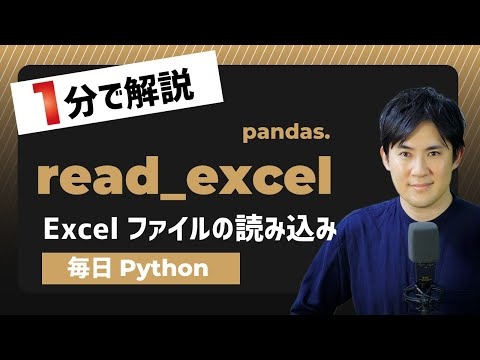

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('BKxHgFHh4og', width=640, height=360)

### HTML 文書からの作成 ###

``` python
andas.read_html(io, **kwargs)
```

この関数は、 HTML 文書内の全てのテーブル要素を読み込み、 `pandas.DataFrame` オブジェクトのリストを返す。処理される HTML 文書内のテーブル要素が 1 つだけの場合でもサイズが 1 のリストを返す。

この機能は `beautifulsoup4`、 `lxml`、 `html5lib` に依存するので、あらかじめこれらをインストールしておく必要がある。

| 引数 | 意味 |
|:---|:---|
| `io` | 読み込むファイルのパス、またはファイルオブジェクト。 URL を指定することもできる |
| `match` | 正規表現を示す文字列を指定する。その正規表現にマッチするテキストを含むテーブル要素が処理される。デフォルトでは `'.+'`（空でない文字列とマッチする）なので、全て<br />のテーブル要素が処理される |
| `header` | ヘッダーとして列のラベル `columns` に使用する行の番号（`0` から始まる）を指定する。`<thead>` がなくてヘッダーを推定することもできない場合は `header` を指定する必要<br />がある |
| `index_col`<br />`skiprows`<br />`parse_dates`<br />`encoding`<br />`na_values`<br />`keep_default_na` | `pandas.read_csv()` と同様 |

次のコードは、[Wikipedia の Python のページ](https://ja.wikipedia.org/wiki/Python)の表を取得する実装例である。

In [ ]:
import pandas as pd
url = 'https://ja.wikipedia.org/wiki/Python'
dfs = pd.read_html(url, match='リリース日')
dfs[1]

,バージョン,リリース日[31],サポート期限[32]
0,3.00,2008年12月3日,2009年1月13日
1,3.10,2009年6月27日,2012年4月9日
2,3.20,2011年2月20日,2016年2月20日
3,3.30,2012年9月29日,2017年9月29日
4,3.40,2014年3月16日,2019年3月18日
5,3.50,2015年9月13日,2020年9月30日
6,3.60,2016年12月23日,2021年12月
7,3.70,2018年6月27日,2023年6月
8,3.80,2019年10月14日,2024年10月
9,3.90,2020年10月5日,2025年10月


### データベースからの作成 ###

``` python
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None, dtype_backend=<no_default>, dtype=None)
```

この関数は、 SQL クエリまたはデータベーステーブルを読み込み、 `pandas.DataFrame` オブジェクトを作成して返す。

この機能はデータベースライブラリに依存する。使用可能なデータベースライブラリは、 `adbc-driver-postgresql`、 `SQLAlchemy`、 `sqlite3`（標準ライブラリ）などである。 `sqlite3` 以外なら、あらかじめ依存パッケージをインストールしておく必要がある。

主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `sql` | 実行する SQL クエリまたはテーブル名 |
| `con` | 使用するデータベースライブラリでサポートされる接続オブジェクト |
| `index_col` | 行のラベルとして設定するカラムの名前 |
| `coerce_float` | `True`（デフォルト）の場合、非文字列、非数値オブジェクト（`decimal.Decimal` など）の値を、SQL 結果セットに役立つ浮動小数点数値に変換しようとする |
| `params` | SQL クエリを実行するメソッドに渡すパラメータのリスト。使用される構文は、データベースドライバに依存する |
| `dtype` | `pandas.read_csv()` と同様 |

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect(":memory:")
sql_script = """
CREATE TABLE IF NOT EXISTS test_data (int_column, date_column);
INSERT INTO test_data VALUES(0, '2010-11-12');
INSERT INTO test_data VALUES(1, '2012-11-10');
"""
con.executescript(sql_script)
res = pd.read_sql('SELECT int_column, date_column FROM test_data', con)
display(res)
con.commit()
con.close()

,int_column,date_column
0,0,2010-11-12
1,1,2012-11-10


Series オブジェクトの作成
-------------------------

`pandas.Series` のコンストラクタは次のとおり。

``` python
pandas.Series(data=None, index=None, dtype=None, name=None, copy=None)
```

| 引数 | 意味 |
|:---|:---|
| `data` | `values`（データ本体）となる 1 次元の配列（`numpy.ndarray` オブジェクト）や array-like オブジェクト、辞書、スカラーを指定する |
| `index` | `index`（行のラベル）となる array-like オブジェクトを指定する。文字列でもよく、また重複していてもよい |
| `name` | オブジェクトの `name` 属性を設定する |
| `dtype`<br />`copy` | `pandas.DataFrame` のコンストラクタ引数と同様 |

`data` 引数が辞書の場合、キーが行のラベル `index` に割り当てられる。

In [ ]:
import pandas as pd
d = {'a': 1, 'b': 2, 'c': 3}
pd.Series(d)

,0
a,1
b,2
c,3


`data` 引数が辞書でなくて `index` 引数が渡されない場合、 `0` からの連番が行のラベル `index` となる。

In [ ]:
import pandas as pd
pd.Series([1, 2, 3])

,0
0,1
1,2
2,3


ファイルへの書き込み
--------------------

`pandas.DataFrame` オブジェクトや `pandas.Series` オブジェクトが保持するデータを特定の形式でファイルに書き込むには、 `to_*()` メソッドを呼び出す。

### JSON 形式 ###

``` python
DataFrame.to_json(path_or_buf=None, **kwargs)
Series.to_json(path_or_buf=None, **kwargs)
```

このメソッドは、第 1 引数に、 path-like オブジェクトまたは `write()` 関数を実装するファイルオブジェクトを指定して呼び出すと、 JSON 形式でファイルに書き込む。指定を省略した場合、結果が文字列として返される。

他の引数は全てキーワード専用引数で、主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `orient` | キーワード専用。`pandas.read_json()` 関数の同名の引数と同様に、JSON 文書の構造を伝える文字列を指定する。デフォルトも同様に `'columns'` |
| `force_ascii` | キーワード専用。`True`（デフォルト）の場合、非 ASCII 文字が Unicode エスケープされる |

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  columns=["名前", "年齢", "住所", "血液型"])
df.to_json(force_ascii=False)

'{"名前":{"0":"佐藤","1":"鈴木","2":"斎藤","3":"小林"},"年齢":{"0":12,"1":23,"2":34,"3":45},"住所":{"0":"大阪府","1":"東京都","2":"愛知県","3":"福岡県"},"血液型":{"0":"Ａ型","1":"ＡＢ型","2":"Ｂ型","3":"Ｏ型"}}'

### CSV 形式 ###

``` python
DataFrame.to_csv(path_or_buf=None, **kwargs)
Series.to_csv(path_or_buf=None, **kwargs)
```

このメソッドは、第 1 引数に、 path-like オブジェクトまたは `write()` 関数を実装するファイルオブジェクトを指定して呼び出すと、 CSV 形式でファイルに書き込む。指定を省略した場合、結果が文字列として返される

他の引数は全てキーワード専用引数で、主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `sep` | キーワード専用。区切り文字。デフォルトではカンマ `,` |
| `na_rep` | キーワード専用。欠損値 NaN を置き換える文字列。デフォルトでは空文字 `''` |
| `float_format` | キーワード専用。浮動小数点数の書式設定文字列。例: `float_format='%.3f'` |
| `columns` | キーワード専用。列名のシーケンスを指定した場合、それらの列だけを出力する。`None`（デフォルト）の場合、すべての列が出力される |
| `header` | キーワード専用。`True`（デフォルト）の場合、列のラベル `index` を出力する。文字列のリストが指定された場合、それらの名前でヘッダーを出力する |
| `index` | キーワード専用。`True`（デフォルト）の場合、行のラベル `columns` を出力する |
| `mode` | キーワード専用。出力モードを指定する<br /><br />・`'w'`: 指定したパスが存在しない場合は新規作成、存在する場合は上書きとなる（デフォルト）<br /><br />・`'x'`: 指定したパスが存在しない場合は新規作成、存在する場合はエラーとなり上書きされない<br /><br />・`'a'`: 既存ファイルの末尾に新たな行として追記される |
| `encoding` | キーワード専用。出力ファイルで使用するエンコーディングを表す文字列。デフォルトは `'utf-8'` |

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  columns=["名前", "年齢", "住所", "血液型"])
print(df.to_csv(index=False))

名前,年齢,住所,血液型
佐藤,12,大阪府,Ａ型
鈴木,23,東京都,ＡＢ型
斎藤,34,愛知県,Ｂ型
小林,45,福岡県,Ｏ型



### EXCEL 形式 ###

``` python
DataFrame.to_excel(excel_writer, **kwargs)
Series.to_excel(excel_writer, **kwargs)
```

このメソッドは、第 1 引数に、`.xlsx` ファイルのパスか、 `pandas.ExcelWriter` オブジェクトを指定して呼び出すと、 EXCEL 形式でファイルに書き込む。 `.xlsx` ファイル書き出し機能は `openpyxl` パッケージに依存するため、あらかじめこれをインストールしておく必要がある。

他の引数は全てキーワード専用引数で、主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `sheet_name` | キーワード専用。書き込むシート名を指定する。省略すると、`Sheet1` のような名前になる |
| `na_rep`<br />`float_format`<br />`columns`<br />`header`<br />`index` | `DataFrame.to_csv()` メソッドと同様 |

`pandas.ExcelWriter` のコンストラクタは次のとおり。

``` python
pandas.ExcelWriter(path, engine=None, date_format=None, datetime_format=None, mode='w', storage_options=None, if_sheet_exists=None, engine_kwargs=None)
```

| 引数 | 意味 |
|:---|:---|
| `path` | `.xlsx` ファイルのパス |
| `mode` | 出力モードを指定する<br /><br />・`'w'`: 指定したパスが存在しない場合は新規作成、存在する場合は上書きとなる（デフォルト）<br /><br />・`'a'`: 既存ファイルの末尾に新たな行として追記される |

`pandas.ExcelWriter` はコンテキストマネージャーであり、 with 構文をサポートする。`__enter__()` メソッドはオブジェクト自身を返す。`__exit__()` メソッドはオブジェクトの `close()` メソッドを実行する。

1 つの `.xlsx` ファイルの複数のシートに書き込む場合、 with 構文で次のように書く。

``` python
with pd.ExcelWriter('output.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')
```

既存の `.xlsx` ファイルに追記する場合は、 `pandas.ExcelWriter` オブジェクトを次のように作成して使用することになる:

``` python
with pd.ExcelWriter('output.xlsx', mode='a') as writer:
    df1.to_excel(writer, sheet_name='Sheet_name_3')
```

実際の動作は、次の動画で確認できる。

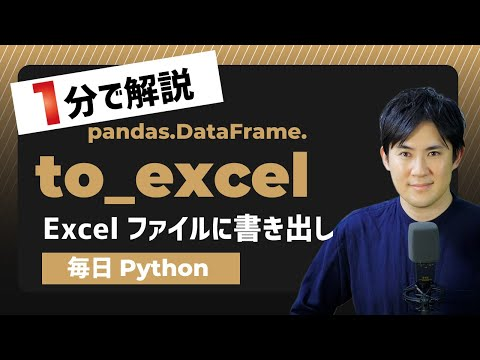

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('TPiMyqbvggM', width=640, height=360)

### データベース ###

``` python
DataFrame.to_sql(name, con, **kwargs)
Series.to_sql(name, con, **kwargs)
```

このメソッドは、第 1 引数に指定したテーブル名で、第 2 引数で指定した SQL 接続オブジェクトを介してデータベースに書き込む。

この機能は `SQLAlchemy` に依存する。あらかじめ依存パッケージをインストールしておく必要がある。

他の引数は全てキーワード専用引数で、主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `if_exists` | テーブルがすでに存在する場合の動作方法を指定する<br /><br />・`'fail'`: `ValueError` を発生させる（デフォルト）<br /><br />・`'replace'`: 新しい値を挿入する前にテーブルを削除する<br /><br />・`'append'`: 既存のテーブルに新しい値を挿入する |

In [ ]:
import pandas as pd
import sqlite3
import datetime

df = pd.DataFrame({'int_column': [0, 1], 'date_column': [datetime.date(2010, 11, 12), datetime.date(2012, 11, 10)]})
con = sqlite3.connect(':memory:')
df.to_sql('test_data', con, if_exists='replace')
res = pd.read_sql('SELECT int_column, date_column FROM test_data', con)
display(res)
con.commit()
con.close()

,int_column,date_column
0,0,2010-11-12
1,1,2012-11-10


### Pickle 形式 ###

``` python
DataFrame.to_pickle(path, **kwargs)
Series.to_pickle(path, **kwargs)
```

このメソッドは、第 1 引数に、 path-like オブジェクトまたは `write()` 関数を実装するバイナリファイルオブジェクトを指定して呼び出すと、Pickle 形式でファイルに書き込む。`open()` 関数を使う場合はバイナリモード `mode='wb'` を指定する必要がある。

保存した Pickle 形式は、 `pickle.load()` 関数で読み込むことができる。 `pandas` もデシリアライズするための `pandas.read_pickle()` 関数を提供している。

In [ ]:
import pandas as pd
import io
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  columns=["名前", "年齢", "住所", "血液型"])
with io.BytesIO() as stream:
    df.to_pickle(stream)
    stream.seek(0)
    display(pd.read_pickle(stream))

,名前,年齢,住所,血液型
0,佐藤,12,大阪府,Ａ型
1,鈴木,23,東京都,ＡＢ型
2,斎藤,34,愛知県,Ｂ型
3,小林,45,福岡県,Ｏ型


Series のアクセサ
-----------------

`pandas.Series` は、**アクセサ**（accessor）と呼ばれる特別なプロパティを介して、データ型固有のメソッドを提供している。

### 文字列 ###

`Series.str` アクセサを使用すると、 `pandas.Series` の各要素に文字列としてアクセスし、それにいくつかのメソッドやプロパティを適用できる。

以下のメソッドは、いずれも `pandas.Series` か `pandas.DataFrame` オブジェクトを返す。戻り値である `pandas.Series` の dtype は、メソッドによって異なる。

| メソッド | 機能 |
|:---|:---|
| `Series.str.capitalize()` | `Series` 内の文字列を大文字に変換する |
| `Series.str.casefold()` | `Series` 内の文字列を大文字と小文字に変換する |
| `Series.str.cat(others=None, sep=None, na_rep=None,`<br />` join='left')` | `Series` 内の文字列を指定された区切り文字で連結する |
| `Series.str.center(width, fillchar=' ')` | `Series` 内の文字列の左側と右側をパディングする |
| `Series.str.contains(pat, case=True, flags=0,`<br />` na=None, regex=True)` | `Series` の文字列内にパターンまたは正規表現が含まれているかどうかをテストする |
| `Series.str.count(pat, flags=0)` | `Series` の各文字列内のパターンの出現をカウントする |
| `Series.str.decode(encoding, errors='strict')` | `Series` 内の文字列を、指定されたエンコーディングを使用してデコードする |
| `Series.str.encode(encoding, errors='strict')` | `Series` 内の文字列を、指定されたエンコードを使用してエンコードする |
| `Series.str.endswith(pat, na=None)` | 各文字列要素の末尾がパターンと一致するかどうかをテストする |
| `Series.str.extract(pat, flags=0, expand=True)` | 正規表現 `pat` 内のキャプチャーグループを `DataFrame` 内の列として抽出する |
| `Series.str.extractall(pat, flags=0)` | 正規表現 `pat` 内のキャプチャグループを `DataFrame` 内の列として抽出する |
| `Series.str.find(sub, start=0, end=None)` | `Series` 内の各文字列で部分文字列が見つかる最初のインデックスを返す。見つからなければ `-1` を返す |
| `Series.str.findall(pat, flags=0)` | `Series` 内のパターンまたは正規表現のすべての出現を検索する |
| `Series.str.fullmatch(pat, case=True, flags=0, na=None)` | 各文字列が正規表現に完全に一致するかどうかをテストする |
| `Series.str.get(i)` | `Series` に要素として含まれるシーケンスかマッピングから指定位置または指定キーの要素を抽出する |
| `Series.str.index(sub, start=0, end=None)` | `Series` 内の各文字列で部分文字列が見つかる最初のインデックスを返す。見つからなければエラーが発生する |
| `Series.str.join(sep)` | `Series` に要素として含まれるリストを、渡された区切り文字で結合する |
| `Series.str.len()` | `Series` の各要素の長さを計算する |
| `Series.str.ljust(width, fillchar=' ')` | `Series` 内の文字列の右側をパディングする |
| `Series.str.lower()` | `Series` 内の文字列を小文字に変換する |
| `Series.str.lstrip(to_strip=None)` | 先頭の文字を削除する |
| `Series.str.match(pat, case=True, flags=0, na=None)` | 各文字列が正規表現の一致で始まるかどうかをテストする |
| `Series.str.normalize(form)` | `Series` 内の文字列に対して Unicode 正規化した文字列を返す |
| `Series.str.pad(width, side='left', fillchar=' ')` | `Series` 内の文字列を指定幅の中に埋め込む |
| `Series.str.partition(sep=' ', expand=True)` | `sep` が最初に出現した位置で文字列を分割する |
| `Series.str.removeprefix(prefix)` | 各文字列の先頭の `prefix` を削除する |
| `Series.str.removesuffix(suffix)` | 各文字列の末尾の `suffix` を削除する |
| `Series.str.repeat(repeats)` | `Series` 内の各文字列を `repeats` 回繰り返した文字列を作成する |
| `Series.str.replace(pat, repl, n=-1, case=None, flags=0,`<br />` regex=False)` | `Series` 内のパターン/正規表現の各出現箇所を置き換える |
| `Series.str.rfind(sub, start=0, end=None)` | `Series` 内の各文字列で部分文字列が見つかる最後のインデックスを返す。見つからなければ `-1` を返す |
| `Series.str.rindex(sub, start=0, end=None)` | `Series` 内の各文字列で部分文字列が見つかる最後のインデックスを返す。見つからなければエラーが発生する |
| `Series.str.rjust(width, fillchar=' ')` | `Series` 内の文字列の左側をパディングする |
| `Series.str.rpartition(sep=' ', expand=True)` | `sep` が最後に出現した位置で文字列を分割する |
| `Series.str.rstrip(to_strip=None)` | 末尾の文字を削除する |
| `Series.str.slice(start=None, stop=None, step=None)` | `Series` の各要素から部分文字列を切り取る |
| `Series.str.slice_replace(start=None, stop=None, repl=None)` | `Series` の各要素から部分文字列を切り取り、別の値に置き換える |
| `Series.str.split(pat=None, *, n=-1, expand=False, regex=None)` | 指定された区切り文字/デリミタを中心に文字列を分割する |
| `Series.str.rsplit(pat=None, *, n=-1, expand=False)` | 指定された区切り文字/デリミタを中心に文字列を末尾から分割する |
| `Series.str.startswith(pat, na=None)` | 各文字列要素の先頭がパターンと一致するかどうかをテストする |
| `Series.str.strip(to_strip=None)` | 先頭と末尾の文字を削除する |
| `Series.str.swapcase()` | `Series` 内の文字列を、大文字は小文字に、小文字は大文字に変換する |
| `Series.str.title()` | `Series` 内の文字列を単語ごとに大文字から始まるように変換する |
| `Series.str.translate(table)` | 指定された変換テーブルを使用して文字列内のすべての文字を変換する |
| `Series.str.upper()` | `Series` 内の文字列を大文字に変換する |
| `Series.str.wrap(width, **kwargs)` | `Series` 内の文字列を指定した行の長さで折り返す |
| `Series.str.zfill(width)` | `Series` 内の文字列の前に `0` 文字を追加する |
| `Series.str.isalnum()` | 各文字列内の全ての文字が英数字であるかどうかを確認する |
| `Series.str.isalpha()` | 各文字列内の全ての文字がアルファベットであるかどうかを確認する |
| `Series.str.isdigit()` | 各文字列内の全ての文字が数字であるかどうかを確認する |
| `Series.str.isspace()` | 各文字列内の全ての文字が空白かどうかを確認する |
| `Series.str.islower()` | 各文字列内の全ての文字が小文字であるかどうかを確認する |
| `Series.str.isupper()` | 各文字列内の全ての文字が大文字であるかどうかを確認する |
| `Series.str.istitle()` | 各文字列内の全ての単語が大文字で始まるどうかを確認する |
| `Series.str.isnumeric()` | 各文字列内の全ての文字が数値であるかどうかを確認する |
| `Series.str.isdecimal()` | 各文字列内の全ての文字が 10 進数であるかどうかを確認する |
| `Series.str.get_dummies([sep])` | `Series` のダミー/インジケーター変数の `DataFrame` を返す |

### 日時・期間 ###

`Series.dt` アクセサを使用すると、 `pandas.Series` の値に `datetime` のようにアクセスし、それにいくつかのプロパティやメソッドを適用できる。

以下のプロパティやメソッドは、いずれも `pandas.Series` オブジェクトを返す。戻り値である `pandas.Series` の dtype は、メソッドによって異なる。

| プロパティ | 機能 |
|:---|:---|
| `Series.dt.date` | `datetime.date` オブジェクトの Numpy 配列を返す |
| `Series.dt.time` | `datetime.time` オブジェクトの Numpy 配列を返す |
| `Series.dt.timetz` | タイムゾーンを含む `datetime.time` オブジェクトの Numpy 配列を返す |
| `Series.dt.year` | `datetime` の年 |
| `Series.dt.month` | `datetime` の月（1-12） |
| `Series.dt.day` | `datetime` の日 |
| `Series.dt.hour` | `datetime` の時 |
| `Series.dt.minute` | `datetime` の分 |
| `Series.dt.second` | `datetime` の秒 |
| `Series.dt.microsecond` | `datetime` のマイクロ秒 |
| `Series.dt.nanosecond` | `datetime` のナノ秒 |
| `Series.dt.dayofweek` | `datetime` の曜日（月曜=0、日曜=6） |
| `Series.dt.day_of_week` | `datetime` の曜日（月曜=0、日曜=6） |
| `Series.dt.weekday` | `datetime` の曜日（月曜=0、日曜=6） |
| `Series.dt.dayofyear` | 1 年の初めからの日数 |
| `Series.dt.day_of_year` | 1 年の初めからの日数 |
| `Series.dt.days_in_month` | 月の日数 |
| `Series.dt.quarter` | 何番目の四半期か |
| `Series.dt.is_month_start` | 日付が月の最初の日かどうか |
| `Series.dt.is_month_end` | 日付が月の最終日かどうか |
| `Series.dt.is_quarter_start` | 日付が四半期の初日であるかどうか |
| `Series.dt.is_quarter_end` | 日付が四半期の最終日かどうか |
| `Series.dt.is_year_start` | 日付が年の最初の日かどうか |
| `Series.dt.is_year_end` | 日付が年の最終日かどうか |
| `Series.dt.is_leap_year` | 日付が閏年に属するかどうか |
| `Series.dt.daysinmonth` | 月の日数 |
| `Series.dt.days_in_month` | 月の日数 |
| `Series.dt.tz` | タイムゾーン |

| メソッド | 機能 |
|:---|:---|
| `Series.dt.isocalendar()` | ISO 8601 標準に従って年、週、日を計算する |
| `Series.dt.tz_localize(*args, **kwargs)` | naive な `datetime` を aware な `datetime` にローカライズする |
| `Series.dt.tz_convert(*args, **kwargs)` | `tz` 対応の `datetime` をあるタイムゾーンから別のタイムゾーンに変換する |
| `Series.dt.normalize(*args, **kwargs)` | 時間を `00:00:00` に変換する |
| `Series.dt.strftime(*args, **kwargs)` | 指定された日時書式を使用して文字列に変換する |
| `Series.dt.month_name(*args, **kwargs)` | 指定されたロケールで月の名前を返す |
| `Series.dt.day_name(*args, **kwargs)` | 指定されたロケールで曜日の名前を返す |

DataFrame の操作
----------------

### 型変換 ##

``` python
DataFrame.astype(dtype, copy=None, errors='raise')
Series.astype(dtype, copy=None, errors='raise')
```

このメソッドは、 dtype が変更された新たなオブジェクトを返す。元のオブジェクト自体は型変換されない。

| 引数 | 意味 |
|:---|:---|
| `dtype` | `numpy.dtype` の指定方法で dtype 指定すると、全ての列で同じ型への型変換が行われる。辞書 `{'列名': dtype, ...}` を指定すると、任意の列を個別に型変換できる |
| `copy` | `True` の場合、コピーを返す |
| `errors` | `'raise'`（デフォルト）の場合、型変換でエラーが発生すると例外を送出する。`'ignore'` の場合、例外を抑制し、エラーが発生した場合は元のオブジェクトを返す |

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
display(df.dtypes)
display(df.astype('int32').dtypes)

,0
col1,int64
col2,int64


,0
col1,int32
col2,int32


``` python
pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=<no_default>, unit=None, infer_datetime_format=<no_default>, origin='unix', cache=True)
```

この関数は、入力データを日時型に変換する。

主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `arg` | 変換対象のオブジェクト。`DataFrame` が提供される場合、ラベルが `'year'`、`'month'`、`'day'` である 3 つの列が存在する必要がある。`'year'` 列は 4 桁の形式で指定する必要がある |
| `errors` | 変換に失敗したときの動作を以下の文字列から指定する<br /><br />・`'raise'`: 例外が発生する（デフォルト）<br /><br />・`'coerce'`: 欠損値にする<br /><br />・`'ignore'`: もとの値をそのまま返す |
| `dayfirst` | `True` の場合、入力が文字列なら、あいまいな形式の日付を最初に日で解析する。例えば、`'10/11/12'` は `2010-11-12` と解析される。デフォルトは `False` |
| `yearfirst` | `True` の場合、入力が文字列なら、あいまいな形式の日付を最初に年で解析する。例えば、`'10/11/12'` は `2010-11-12` と解析される。デフォルトは `False`。`dayfirst` と `yearfirst` の両方が `True` の場合、`yearfirst` が優先される |
| `utc` | `True` の場合、UTC タイムゾーンを適用する。デフォルトは `False` |
| `format` | `pandas.read_csv()` 関数の `date_format` と同じ |
| `unit` | 入力が数値の場合に、UNIX タイムスタンプとして解釈するための単位を指定する。`'ms'` ならミリ秒。デフォルトは `'ns'` でナノ秒 |

次のコードは、`pandas.DataFrame` の文字列型の列を日時型に変換する例である。

In [ ]:
import pandas as pd
df = pd.DataFrame({'date': ['2024-1-15', '2024-10-31']})
print(df.info(), "\n")
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes
None


変換に失敗する場合には、 `format` 引数で文字列形式を指定するとよい。

In [ ]:
import pandas as pd
df = pd.DataFrame({'date': ['2024年1月15日', '2024年10月31日']})
print(df.info(), "\n")
df['date'] = pd.to_datetime(df['date'], format='%Y年%m月%d日')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes
None


,date
0,2024-01-15
1,2024-10-31


``` python
pandas.to_timedelta(arg, unit=None, errors='raise')
```

この関数は、入力データを timedelta 型（時間の長さを表すデータ型）に変換する。

次のコードは、`pandas.DataFrame` の文字列型の列を日時型に変換する例である。

In [ ]:
import pandas as pd
df = pd.DataFrame({'timedelta': ['02:30:00', '1 days 2 hours 30 minutes']})
print(df.info(), "\n")
df['timedelta'] = pd.to_timedelta(df['timedelta'])
print(df.info(), "\n")
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timedelta  2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   timedelta  2 non-null      timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 144.0 bytes
None 



,timedelta
0,0 days 02:30:00
1,1 days 02:30:00


### 行・列・要素の参照 ###

`pandas.DataFrame` オブジェクト `df` における行・列・要素は、自身またはプロパティに対するインデクス参照で選択できる。

| インデクス参照 | 結果 |
|:---|:---|
| `df['列名']` | 列を参照する。 `pandas.Series` オブジェクトが返される |
| `df[['列名1', '列名2', ...]]` | 複数列を参照する。`pandas.DataFrame` オブジェクトが返される。列の順番は指定したリストの順番になる |
| `df[行名・行番号のスライス]` | 該当範囲の行を参照する。`start:stop:step` が使える。 `pandas.DataFrame` オブジェクトが返される |
| `df[ブーリアンインデックス]` | `True` の行を参照する。 `pandas.DataFrame` オブジェクトが返される。ブール値のリストの要素数と行数が一致していないとエラーが発生する |
| `df.at['行名', '列名']` | 要素を参照する |
| `df.iat[行番号, 列番号]` | 要素を参照する |
| `df.loc['行名', '列名']` | `at` プロパティとの違いは、行名や列名に代えてリストやスライス、ブーリアンインデックスを使用できること。リストで指定すると、行や列の順番は指定したリスト<br />の順番になる。スライスには `start:stop:step` が使える。`df.loc['行名', :]` は `df.loc['行名']` と省略できる。リストなどを使用した場合は、該当範囲のブロック<br />に対応する `pandas.DataFrame` オブジェクトが返される（1 行や 1 列を参照する場合は `pandas.Series` オブジェクトが返される） |
| `df.iloc[行番号, 列番号]` | `iat` プロパティとの違いは、行番号や列番号に代えてリストやスライス、ブーリアンインデックスを使用できること。ほかは `loc` プロパティと同様である |

単独の値にアクセスする場合、処理速度は `loc`、 `iloc` より `at`、 `iat` のほうが速い。

`df.loc[5]` の `5` は、行のラベルとして解釈され、行番号（`0` から始まる番号）として解釈されないことに注意する。

インデックス参照をラベルでハードコーディングしたくないなら、`index`、`columns` 属性を使うとよい。例えば、`df.at[df.index[2], df.columns[3]]`。

**ラベルのスライス `start:stop` では `stop` が含まれることに注意する**。行番号や列番号のスライス `start:stop` では `stop` が含まれない。

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  index=["row1", "row2", "row3", "row4"],
                  columns=["名前", "年齢", "住所", "血液型"])
display(df["row1":"row3"])
display(df[0:3])
display(df.loc["row1":"row3", "名前":"住所"])
display(df.iloc[0:3, 0:3])

,名前,年齢,住所,血液型
row1,佐藤,12,大阪府,Ａ型
row2,鈴木,23,東京都,ＡＢ型
row3,斎藤,34,愛知県,Ｂ型


,名前,年齢,住所,血液型
row1,佐藤,12,大阪府,Ａ型
row2,鈴木,23,東京都,ＡＢ型
row3,斎藤,34,愛知県,Ｂ型


,名前,年齢,住所
row1,佐藤,12,大阪府
row2,鈴木,23,東京都
row3,斎藤,34,愛知県


,名前,年齢,住所
row1,佐藤,12,大阪府
row2,鈴木,23,東京都
row3,斎藤,34,愛知県


`pandas` では、ブーリアンインデックスを独自に拡張し、 `bool` 型の `pandas.Series` オブジェクトを使用できる。 `pandas.Series` オブジェクトを使う場合、その `index` で行や列を指定してブール値を設定するので、ブール値の順番は自由である（ただし、順番が違うと Warning が表示される）。 `index` のラベルやサイズが対象のものと一致していないときにはエラーが発生する。

ただし、 **`iloc` プロパティでは、 `bool` 型の `pandas.Series` オブジェクトを使用できない**。

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  index=["row1", "row2", "row3", "row4"],
                  columns=["名前", "年齢", "住所", "血液型"])
display(df[pd.Series({"row1": False, "row2": True, "row3": True, "row4": False})])  # df[[False, True, True, False]] と同じ
display(df.loc[:, pd.Series({"名前": True, "年齢": False, "住所": False, "血液型": True})])  # df.loc[:, [True, False, False, True]] と同じ
try:
    display(df.iloc[:, pd.Series([True, False, False, True])])
except NotImplementedError:
    print("iloc プロパティでは、 bool 型の pandas.Series オブジェクトを使用できない")

,名前,年齢,住所,血液型
row2,鈴木,23,東京都,ＡＢ型
row3,斎藤,34,愛知県,Ｂ型


,名前,血液型
row1,佐藤,Ａ型
row2,鈴木,ＡＢ型
row3,斎藤,Ｂ型
row4,小林,Ｏ型


iloc プロパティでは、 bool 型の pandas.Series オブジェクトを使用できない


以上のインデックス参照方法は、 `pandas.Series` にも適用できる。 `s['行名']` で行を参照する。 `at`、 `iat`、 `loc`、 `iloc` は行名、行番号だけを指定する。

In [ ]:
import pandas as pd
s = pd.Series(['a', 'b', 'c', 'd'], index=['idx1', 'idx2', 'idx3', 'idx4'])
display(s)
assert s['idx4'] == 'd'
display(s[::2])
assert s.iat[1] == 'b'
display(s.loc[['idx1', 'idx4']])

,0
idx1,a
idx2,b
idx3,c
idx4,d


,0
idx1,a
idx3,c


,0
idx1,a
idx4,d


`pandas.Index` などのインデックスオブジェクトは、`get_loc()` メソッドを持つ。このメソッドは、ラベルを渡して呼び出すと、対応する行番号や列番号を返す。存在しないラベルを指定した場合は、エラーとなる。

``` python
Index.get_loc(key)
```

In [ ]:
import pandas as pd
s = pd.Series(['a', 'b', 'c', 'd'], index=['idx1', 'idx2', 'idx3', 'idx4'])
assert s.index.get_loc('idx4') == 3

### マルチインデックスでの行・列・要素の参照 ###

マルチインデックスに対して通常の方法でインデックス参照をすると、下位のラベルを全て選択することになる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3, 4, 5, 6], [10, 20, 30, 40, 50, 60]],
                  index=[2020, 2021])
df.columns = pd.MultiIndex.from_product([["Apple", "Banana", "Carrot"], ["ShopA", "ShopB"]])
display(df)
display(df["Banana"])

Apple       Banana       Carrot      
     ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

,ShopA,ShopB
2020,3,4
2021,30,40


上位のラベルから下位のラベルへタプルで順にラベルを指定して絞り込んでいくこともできる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3, 4, 5, 6], [10, 20, 30, 40, 50, 60]],
                  index=[2020, 2021])
df.columns = pd.MultiIndex.from_product([["Apple", "Banana", "Carrot"], ["ShopA", "ShopB"]])
display(df)
display(df[("Banana", "ShopB")])

Apple       Banana       Carrot      
     ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

,Banana
,ShopB
2020,4
2021,40


マルチインデックスで上位から順にタプルでラベルを指定する場合、スライスには `pd.IndexSlice[]` を使う。

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3, 4, 5, 6], [10, 20, 30, 40, 50, 60]],
                  index=[2020, 2021])
df.columns = pd.MultiIndex.from_product([["Apple", "Banana", "Carrot"], ["ShopA", "ShopB"]])
display(df)
idx = pd.IndexSlice
display(df.loc[:, idx[:, "ShopA":"ShopB"]])
display(df.loc[:, idx[:, "ShopA"]])

Apple       Banana       Carrot      
     ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

Apple       Banana       Carrot      
     ShopA ShopB  ShopA ShopB  ShopA ShopB
2020     1     2      3     4      5     6
2021    10    20     30    40     50    60

,Apple,Banana,Carrot
,ShopA,ShopA,ShopA
2020,1,3,5
2021,10,30,50


### 空の DataFrame/Series ###

``` python
DataFrame.empty
Series.empty
```

`empty` 属性は、 `DataFrame` や `Series` が空のとき（要素が存在しないとき）`True` で、そうでないとき `False` となる。

In [7]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "Ａ型"],
                   ["鈴木", 23, "東京都", "ＡＢ型"],
                   ["斎藤", 34, "愛知県", "Ｂ型"],
                   ["小林", 45, "福岡県", "Ｏ型"]],
                  index=["row1", "row2", "row3", "row4"],
                  columns=["名前", "年齢", "住所", "血液型"])
display(df)
result = df[df["名前"] == "田中"]
# 条件を満たす行が存在しないため、空の DataFrame が返される
display(result)
assert result.empty == True

,名前,年齢,住所,血液型
row1,佐藤,12,大阪府,Ａ型
row2,鈴木,23,東京都,ＡＢ型
row3,斎藤,34,愛知県,Ｂ型
row4,小林,45,福岡県,Ｏ型


,名前,年齢,住所,血液型


`DataFrame` や `Series` に `NaN` のみが含まれている場合でも、空とはみなされないことに注意。

In [5]:
import pandas as pd
df = pd.DataFrame([[None, None, None]],
                  columns=["名前", "年齢", "住所"])
display(df)
assert df.empty == False

,名前,年齢,住所
0,None,None,None


### ビューとコピー ###

`pandas.DataFrame` にも NumPy 配列と同様にビュー（view）とコピー（copy）がある。インデックス参照で `pandas.DataFrame` の一部を選択して新たな `pandas.DataFrame` を生成する場合、通常はコピーが返されるが、状況によってビューが返される場合もある。ビューかコピーかを完全に予測するのは難しいので、ビューを前提にしてコードを記述するのは問題が起こりやすい。コピーを前提にしたい場合は、明示的に `copy()` メソッドを使用してコピーを作成することが推奨される。

``` python
DataFrame.copy(deep=True)
Series.copy(deep=True)
```

このメソッドは、オブジェクトのコピーを返す。**デフォルトで深いコピーとなる**。第 1 引数に `False` を渡すと、浅いコピーとなり、呼び出し元オブジェクトのデータまたはインデックスがコピーされない。

### 代入 ###

`numpy.ndarray` オブジェクトと同様に、インデックス参照を代入の左辺に置いて、データ本体を更新することができる。この時、暗黙のブロードキャストや型変換が行われる。スカラー、array-like オブジェクトを代入できる。右辺の `shape` 属性と、左辺で返される `pandas.Series`、 `pandas.DataFrame` オブジェクトの `shape` 属性が一致せず、ブロードキャスト可能でないなら、エラーとなる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1., 2., 3.], 'B': [4., 5., 6.]}, dtype=float)
display(df)
df.at[0, "A"] = 100  # int -> float
df.loc[:, "B"] = [400, 500, 600]  # int -> float
df

,A,B
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0


,A,B
0,100.0,400.0
1,2.0,500.0
2,3.0,600.0


`pandas.DataFrame`、 `pandas.Series` を代入することもできるが、以下の点に注意する。

  * `pandas.DataFrame` を代入する場合、右辺は `df2.to_numpy()` のように array-like オブジェクトとして扱われ代入される。したがって、行名、列名は無視され、 `shape` 属性が同じであれば要素ごとに代入が行われる。必要により右辺においてブロードキャストが行われる。
  * `pandas.Series` を代入する場合、同じ行名、行番号を持つ要素ごとに代入が行われる。一致しない部分には欠損値が入る。ブロードキャストは行われない。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1., 2., 3.], 'B': [4., 5., 6.]}, index=['x', 'y', 'z'], dtype=float)
display(df)
df.iloc[:, :] = pd.DataFrame({'X': [10, 20, 30]}, index=['x', 'y', 'w'], dtype=int)
display(df)
df["A"] = pd.Series([100, 200, 300], index=['x', 'y', 'w'])
display(df)

,A,B
x,1.0,4.0
y,2.0,5.0
z,3.0,6.0


,A,B
x,10.0,10.0
y,20.0,20.0
z,30.0,30.0


,A,B
x,100.0,10.0
y,200.0,20.0
z,NaN,30.0


### DataFrame・Series 間の演算 ###

`pandas.DataFrame` 間や `pandas.Series` 間の演算は、基本的に Numpy の配列に似た方法で実行することができるが、行名と列名に基づいたアラインメントが特徴的である。

| 演算 | メソッド | 演算子 | 機能 | 戻り値 |
|:---|:---|:--:|:---|:---|
| 加算 | `add` | `+` | 同じ行名と列名を持つ要素同士で加算する | `DataFrame` |
| 減算 | `sub` | `-` | 同じ行名と列名を持つ要素同士で減算する | `DataFrame` |
| 乗算 | `mul` | `*` | 同じ行名と列名を持つ要素同士で乗算する | `DataFrame` |
| 除算 | `div` | `/` | 同じ行名と列名を持つ要素同士で除算する | `DataFrame` |
| 除算 | `truediv` | `/` | `div` の別名 | `DataFrame` |
| 冪 | `pow` | `**` | 同じ行名と列名を持つ要素同士で冪乗を計算する | `DataFrame` |
| 商 | `floordiv` | `//` | 同じ行名と列名を持つ要素同士で商を計算する | `DataFrame` |
| 剰余 | `mod` | `%` | 同じ行名と列名を持つ要素同士で剰余を計算する | 配列 |

`pandas.DataFrame` 間で加算 `+`、減算 `-`、乗算 `*`、除算 `/` などの演算を行う場合、同じ行名と列名を持つ要素同士が演算される。一致しない部分には欠損値が挿入される。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['x', 'y', 'z'])
df2 = pd.DataFrame({'A': [10, 20, 30], 'C': [7, 8, 9]}, index=['x', 'y', 'z'])
result = df1 + df2
display(df1)
display(df2)
display(result)

,A,B
x,1,4
y,2,5
z,3,6


,A,C
x,10,7
y,20,8
z,30,9


,A,B,C
x,11,NaN,NaN
y,22,NaN,NaN
z,33,NaN,NaN


メソッドで `fill_value` を指定すると、欠損値を指定した値で埋めてから演算を行うことができる。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['x', 'y', 'z'])
df2 = pd.DataFrame({'A': [10, 20, 30], 'C': [7, 8, 9]}, index=['x', 'y', 'z'])
result = df1.add(df2, fill_value=0)
display(df1)
display(df2)
display(result)

,A,B
x,1,4
y,2,5
z,3,6


,A,C
x,10,7
y,20,8
z,30,9


,A,B,C
x,11,4.0,7.0
y,22,5.0,8.0
z,33,6.0,9.0


`pandas.Series` 間の演算も、 `pandas.DataFrame` と同様に、行名を基準に要素同士が演算される。一致しない部分には欠損値が挿入されること、メソッドの `fill_value` を指定できることも同様である。

In [ ]:
import pandas as pd
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([10, 20, 30], index=['b', 'c', 'd'])
result = s1 + s2
display(s1)
display(s2)
display(result)
display(s1.add(s2, fill_value=0))

,0
a,1
b,2
c,3


,0
b,10
c,20
d,30


,0
a,NaN
b,12.0
c,23.0
d,NaN


,0
a,1.0
b,12.0
c,23.0
d,30.0


`pandas.DataFrame` と `pandas.Series` の間の演算は、ブロードキャストが適用される。

デフォルトでは、 `pandas.Series` の行名が `pandas.DataFrame` の列名と一致する場合、 `pandas.DataFrame` の各行に `pandas.Series` が適用される。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['x', 'y', 'z'])
s = pd.Series([10, 20], index=['A', 'B'])
result = df + s
display(df)
display(s)
display(result)

,A,B
x,1,4
y,2,5
z,3,6


,0
A,10
B,20


,A,B
x,11,24
y,12,25
z,13,26


メソッドで `axis=0` を指定すると、 `pandas.DataFrame` の各列に `pandas.Series` が適用される。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['x', 'y', 'z'])
s = pd.Series([10, 20, 30], index=['x', 'y', 'z'])
result = df.add(s, axis=0)
display(df)
display(s)
display(result)

,A,B
x,1,4
y,2,5
z,3,6


,0
x,10
y,20
z,30


,A,B
x,11,14
y,22,25
z,33,36


### 丸め ###

``` python
DataFrame.round(decimals=0, *args, **kwargs)
Series.round(decimals=0, *args, **kwargs)
```

このメソッドは、第一引数 `decimals` に指定した小数点以下の桁数（デフォルトは `0`）に数値の「偶数丸め」を行った新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。

「偶数丸め」は、丸める 1 つ上の桁が奇数の場合は `5` を切り上げ、偶数の場合は `5` を切り捨てる。次のコードでは、 `2.5` の処理が一般的な四捨五入とは異なり `5` を切り捨てている。

In [ ]:
import pandas as pd
df = pd.DataFrame({'val1': [1.1, 1.4, 1.5, 1.6, 1.9],
                   'val2': [2.1, 2.4, 2.5, 2.6, 2.9]})
df.round()

,val1,val2
0,1.0,2.0
1,1.0,2.0
2,2.0,2.0
3,2.0,3.0
4,2.0,3.0


第一引数 `decimals` には負数を指定することもでき、 `-1` なら十の位、 `-2` なら百の位に丸められる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'val': [123.45, 9876.54]})
display(df.round(-1))
display(df.round(-2))

,val
0,120.0
1,9880.0


,val
0,100.0
1,9900.0


第一引数 `decimals` には辞書を指定することもでき、各キーの列名に限定して、値の桁数に丸めることができる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'id': [1001, 2001], 'val1': [0.239, -0.435], 'val2': [0.399, -0.211], 'val3': [0.890, -0.663]})
df.round({'val1': 2, 'val2': 1})

,id,val1,val2,val3
0,1001,0.24,0.4,0.890
1,2001,-0.44,-0.2,-0.663


### 転置 ###

`pandas.DataFrame` オブジェクトの行と列を入れ替えた（＝転置した）新しいオブジェクトを取得するには、 `T` プロパティか、 `transpose()` メソッドを使う。どちらの方法も、呼び出し元のオブジェクトは変更されない。

全ての列の dtype が同じである場合、 `T` プロパティや `transpose()` メソッドはビューを返す。呼び出し元とビューはメモリを共有するので、一方の要素を変更すると他方も変更されるので注意。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'X': [0, 1, 2], 'Y': [3, 4, 5]}, index=['A', 'B', 'C'])
df2 = df1.T
df1.at['C', 'Y'] = 99
display(df1)
display(df2)

,X,Y
A,0,3
B,1,4
C,2,99


,A,B,C
X,0,1,2
Y,3,4,99


### 行名・列名の変更 ###

`pandas.DataFrame` オブジェクトの `index` 属性を上書きすることで行のラベル `index` を変更できる。同様に、 `columns` 属性を上書きすることで列のラベル `columns` を変更できる。

``` python
DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=None, inplace=False, level=None, errors='ignore')
```

このメソッドは、行または列のラベルの一部だけを変更した新しい `pandas.DataFrame` オブジェクトを返す。

第 1 引数に `{"old_name": "new_name", ...}` のように変更前のラベルをキーとし、変更後のラベルを値とする辞書を指定すると、デフォルトでは行ラベルを変更する。 `axis=1` 引数を指定すると、列ラベルを変更する。この引数を使用する場合、行ラベルと列ラベルを同時に変更することはできない。

キーワード専用の `index` 引数に辞書を指定すると行ラベルを、キーワード専用の `columns` 引数に辞書を指定すると列ラベルを変更する。これらのキーワード専用引数を同時に指定すると、行ラベルと列ラベルを同時に変更することができる。

デフォルトでは、もとの `pandas.DataFrame` オブジェクトは変更されない。キーワード専用の `inplace` 引数に `True` を指定すると、呼び出し元のオブジェクトを変更し、このメソッドは `None` を返す。

In [ ]:
import pandas as pd
df = pd.DataFrame({'month': [1, 4, 7, 10], 'year': [2012, 2014, 2013, 2014], 'sale': [55, 40, 84, 31]})
display(df)
df.rename(columns={'sale': 'saleA'}, index={0: 'row1', 1: 'row2', 2: 'row3', 3: 'row4'}, inplace=True)
display(df)

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


,month,year,saleA
row1,1,2012,55
row2,4,2014,40
row3,7,2013,84
row4,10,2014,31


`pandas.Series` も `rename()` メソッドを持つ。

In [ ]:
import pandas as pd
s = pd.Series([1, 2, 3])
s.rename({1: 3, 2: 5})

,0
0,1
3,2
5,3


``` python
DataFrame.set_index(keys, *, drop=True, append=False, inplace=False, verify_integrity=False)
```

このメソッドは、既存の列を行のラベル `index` に設定した新しい `pandas.DataFrame` オブジェクトを返す。

| 引数 | 意味 |
|:---|:---|
| `keys` | 行のラベルとして使用する既存の列の列名を指定する。複数の列を列名のリストや配列で指定すると、マルチインデックスとして設定する |
| `drop` | `True`（デフォルト）の場合、新しい行のラベルとして使用する列をデータ本体から削除する。`False` の場合、データ本体にも残る |
| `append` | `False`（デフォルト）の場合、既存のラベルは削除される。`True` の場合、既存のラベルに列を追加する |
| `inplace` | `True` の場合、呼び出し元のオブジェクト自体を変更し、戻り値が `None` となる。`False`（デフォルト）の場合、呼び出し元のオブジェクトは変更されない |
| `verify_integrity` | `True` の場合、新しいラベルに重複があればエラーが発生する。`False`（デフォルト）の場合、新しいラベルに重複があってもそのまま使用される |

In [ ]:
import pandas as pd
df = pd.DataFrame({'month': [1, 4, 7, 10], 'year': [2012, 2014, 2013, 2014], 'sale': [55, 40, 84, 31]})
display(df)
display(df.set_index('month'))
display(df.set_index(['year', 'month']))

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


既存の列と新しいラベルでマルチインデックスを作ることもできる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
display(df)
display(df.set_index([[0, 1, 2, 3], 'year']))

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


,,month,sale
,year,,
0,2012,1,55
1,2014,4,40
2,2013,7,84
3,2014,10,31


``` python
DataFrame.reset_index(level=None, *, drop=False, inplace=False, col_level=0, col_fill='', allow_duplicates=<no_default>, names=None)
Series.reset_index(level=None, *, drop=False, name=<no_default>, inplace=False, allow_duplicates=False)
```

このメソッドは、行のラベル `index` を `0` 始まりの連番に振り直した新しい `pandas.DataFrame` オブジェクトを返す。主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `level` | マルチインデックスの場合に、単一またはラベルのリストを指定すると、指定されたラベルのみを `index` から外す |
| `drop` | `False`（デフォルト）の場合、もとの行のラベルはデータ本体の先頭に追加される。`True` の場合、もとの行のラベルは削除される |
| `inplace` | `True` の場合、呼び出し元のオブジェクト自体を変更し、戻り値が `None` となる。`False`（デフォルト）の場合、呼び出し元のオブジェクトは変更されない |
| `names` | もとの行のラベルがデータ本体の先頭に追加される際に、その列に使用する名前を指定できる。マルチインデックスの場合は、追加される全ての列についてリストで名前を<br />指定する。`drop` 引数が `True` の場合、この引数は無視される |
| `col_level` | 列がマルチインデックスの場合、もとの行のラベルがデータ本体の先頭に追加される際に、その列に使用する名前をどの階層に追加するのかを整数で指定する。デフォルト<br />は、一番上の階層を示す `0` |
| `col_fill` | 列がマルチインデックスの場合、もとの行のラベルがデータ本体の先頭に追加される際に、`col_level` 以外の階層でのラベルを指定する。デフォルトは空文字列 `''` |

In [ ]:
import pandas as pd
df = pd.DataFrame([('bird', 389.0), ('bird', 24.0), ('mammal', 80.5), ('mammal', None)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
display(df)
display(df.reset_index())
display(df.reset_index(drop=True))

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


In [ ]:
import pandas as pd
index = pd.MultiIndex.from_tuples([('bird', 'falcon'), ('bird', 'parrot'), ('mammal', 'lion'), ('mammal', 'monkey')],
                                  names=['class', 'name'])
columns = pd.MultiIndex.from_tuples([('speed', 'max'), ('species', 'type')])
df = pd.DataFrame([(389.0, 'fly'), (24.0, 'fly'), (80.5, 'run'), (np.nan, 'jump')],
                  index=index,
                  columns=columns)
display(df)
display(df.reset_index(names=['classes', 'names']))
display(df.reset_index(level='class', col_level=1, col_fill='species'))

speed species
                 max    type
class  name                 
bird   falcon  389.0     fly
       parrot   24.0     fly
mammal lion     80.5     run
       monkey    NaN    jump

,classes,names,speed,species
,,,max,type
0,bird,falcon,389.0,fly
1,bird,parrot,24.0,fly
2,mammal,lion,80.5,run
3,mammal,monkey,NaN,jump


,species,speed,species
,class,max,type
name,,,
falcon,bird,389.0,fly
parrot,bird,24.0,fly
lion,mammal,80.5,run
monkey,mammal,NaN,jump


### 要素の置換 ###

``` python
DataFrame.replace(to_replace=None, value=<no_default>, *, inplace=False, limit=None, regex=False, method=<no_default>)
Series.replace(to_replace=None, value=<no_default>, *, inplace=False, limit=None, regex=False, method=<no_default>)
```

このメソッドは、要素が指定された値に置換されたオブジェクトを返す。呼び出し元のオブジェクトは変更しない。

| 引数 | 意味 |
|:---|:---|
| `to_replace` | 置換対象を指定する |
| `value` | 置換後の値を指定する |
| `inplace` | `True` を指定すると、デフォルトの動作を変更し、呼び出し元のオブジェクト自体を変更する。メソッドの戻り値は `None` となる |
| `limit` | 置換操作の回数の上限を指定する |
| `regex` | `True` の場合、`to_replace` や `value` を正規表現として解釈する。または正規表現のリスト、辞書、配列を指定することもできる。この場合、`to_replace` は `None` であることが必要 |
| `method` | `to_replace` がスカラーまたはリスト、タプルで、`value` が `None` の場合に置換に使用するメソッドを以下の文字列で指定する<br /><br />・`'pad'`: 前の値で埋める<br /><br />・`'ffill'`: 前の値で埋める（'pad'の別名）<br /><br />・`'bfill'`: 後の値で埋める |

単純な値の置換では、第 1 引数にもとの値、第 2 引数に置換後の値を指定する。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [3, 1, 2], 'C': [2, 3, 1]})
display(df)
display(df.replace(1, 10))

,A,B,C
0,1,3,2
1,2,1,3
2,3,2,1


,A,B,C
0,10,3,2
1,2,10,3
2,3,2,10


複数の値ごとに異なる置換を指定するには、第 1 引数に `{もとの値: 置換後の値}` という形式の辞書を指定する。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [3, 1, 2], 'C': [2, 3, 1]})
display(df)
display(df.replace({1: 10, 2: 20, 3: 300}))

,A,B,C
0,1,3,2
1,2,1,3
2,3,2,1


,A,B,C
0,10,300,20
1,20,10,300
2,300,20,10


第一引数に `{列名: {もとの値: 置換後の値}}` という形式の辞書を指定すると、対象列の要素のみを置換できる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [3, 1, 2], 'C': [2, 3, 1]})
display(df)
display(df.replace({'A': {1: 10}, 'B': {2: 20, 3: 300}}))

,A,B,C
0,1,3,2
1,2,1,3
2,3,2,1


,A,B,C
0,10,300,2
1,2,1,3
2,3,20,1


全て同じ値に置換したい場合は、第 1 引数に `{列名: もとの値}` という形式の辞書、第 2 引数に置換後の値をスカラー値で指定する。第 1 引数のもとの値はリストで指定することも可能。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [3, 1, 2], 'C': [2, 3, 1]})
display(df)
display(df.replace({'A': 1, 'B': [2, 3]}, 100))

,A,B,C
0,1,3,2
1,2,1,3
2,3,2,1


,A,B,C
0,100,100,2
1,2,1,3
2,3,100,1


引数 `regex=True` とすると、第 1 引数や第 2 引数に正規表現を使うことができる。第 1 引数の正規表現でサブグループを使用している場合、第 2 引数では、サブグループにマッチした部分には `\1`、`\2` のような形式で参照できる（後方参照）。

In [ ]:
df = pd.DataFrame({'A': ['cat', 'dog', 'bat'], 'B': ['car', 'dot', 'bot']})
display(df)
display(df.replace(r'^(c.+)', r'\1\1', regex=True))

,A,B
0,cat,car
1,dog,dot
2,bat,bot


,A,B
0,catcat,carcar
1,dog,dot
2,bat,bot


### 行・列の追加 ###

`pandas.DataFrame` オブジェクト `df` では、存在しない行名で `df.loc['NEW'] = value` のように代入すると、その行を新たに追加して値を代入できる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'month': [1, 4, 7, 10], 'sale': [55, 40, 84, 31]})
loc = df.shape[0]
df.loc[loc] = [12, 99]
df

,month,sale
0,1,55
1,4,40
2,7,84
3,10,31
4,12,99


また、 `pandas.DataFrame` オブジェクト `df` では、存在しない列名で `df['NEW'] = value` のように代入すると、その列を新たに追加して値を代入できる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'month': [1, 4, 7, 10], 'year': [2012, 2014, 2013, 2014]})
display(df)
df['saleA'] = 0
display(df)
df['saleB'] = [55, 40, 84, 31]
display(df)

,month,year
0,1,2012
1,4,2014
2,7,2013
3,10,2014


,month,year,saleA
0,1,2012,0
1,4,2014,0
2,7,2013,0
3,10,2014,0


,month,year,saleA,saleB
0,1,2012,0,55
1,4,2014,0,40
2,7,2013,0,84
3,10,2014,0,31


``` python
DataFrame.assign(**kwargs)
```

このメソッドは、キーワード引数に列名を指定すると、列名が既存の場合は値が代入された新しい `pandas.DataFrame` オブジェクトを返し、列名が存在しない場合は末尾の列に追加した新しい `pandas.DataFrame` オブジェクトを返す。呼び出し元のオブジェクトは変更しない。

列名をキーワードにするため、列名が Python 識別子の命名規則に反している場合（アンダースコア以外の記号を含む場合、数字で始まる場合など）には、このメソッドを使うことができない。

更新する値には、通常の代入と同様に、スカラー、リスト、 `pandas.Series` を指定したり、式を指定することができる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'単価': [100, 200, 300, 400],
                   '売上個数': [10, 5, 3, 2]})
display(df)
df_align = df.assign(単価=df['単価'] * 1000)
display(df_align)
display(df_align.assign(売上金額=df_align['単価'] * df_align['売上個数']))

,単価,売上個数
0,100,10
1,200,5
2,300,3
3,400,2


,単価,売上個数
0,100000,10
1,200000,5
2,300000,3
3,400000,2


,単価,売上個数,売上金額
0,100000,10,1000000
1,200000,5,1000000
2,300000,3,900000
3,400000,2,800000


``` python
DataFrame.insert(loc, column, value, allow_duplicates=<no_default>)
```

このメソッドは、任意の位置に新しい列を挿入する。呼び出し元のオブジェクト自体を変更する。

| 引数 | 意味 |
|:---|:---|
| `loc` | 挿入する位置を列番号で指定する。 `0 <= loc <= len(df.shape[1])` の範囲とする必要があり、`-1` のような負数の指定はできない |
| `column` | 列のラベル |
| `value` | 挿入する値。通常の代入と同様に、スカラー、リスト、 `pandas.Series` を指定したり、式を指定することができる |
| `allow_duplicates` | `True` の場合、`column` 引数が既存のラベルと重複することを許可する。デフォルトでは、既存のラベルと重複するとエラーとなる |

`allow_duplicates=True` とし、 `column` 引数が既存のラベルである場合、既存の列を上書きするのではなく、名前が重複する列が挿入されることになるので注意。

In [ ]:
import pandas as pd
df = pd.DataFrame({'名前': ['佐藤', '鈴木', '田中'], 'クラス': ['A', 'B', 'C']})
df.insert(1, 'なまえ', ['さとう', 'すずき', 'たなか'])
display(df)

,名前,なまえ,クラス
0,佐藤,さとう,A
1,鈴木,すずき,B
2,田中,たなか,C


複数の行や列を追加する場合は、 for ループで 1 つずつ追加するより、次の関数を使うほうが効率が良い。

``` python
pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
```

この関数は、複数の `pandas.DataFrame` オブジェクトや `pandas.Series` オブジェクトを連結した新しいオブジェクトを返す。

第 1 引数以外は全てキーワード専用である。

| 引数 | 意味 |
|:---|:---|
| `objs` | `pandas.DataFrame` や `pandas.Series` のシーケンス |
| `axis` | `0` または `'index'` の場合、行方向に連結する（デフォルト）。`1` または `'columns'` の場合、列方向に連結する |
| `join` | `axis` でない軸方向のデータの結合方法を以下の文字列で指定する<br /><br />・`'outer'`: `objs` の少なくとも 1 つで使われるラベルを全て含み、各オブジェクトでラベルのない要素は欠損値を入れる（完全外部結合）。デフォルトの結合方法<br /><br />・`'inner'`: `objs` 全てで使われるラベルのみを含む（内部結合） |
| `ignore_index` | `True` の場合、連結軸のもとのラベルが使用されず、新しいオブジェクトでは連結軸のラベルが `0` 始まりの連番となる。`False`（デフォルト）の場合、もとのラベル<br />が保持される |
| `keys` | シーケンスを指定すると、その要素が最上位ラベルとして使用されるマルチインデックスを構築する |
| `levels` | マルチインデックスを手動で指定したい場合に、ネストされたリストを指定すると、マルチインデックスを構築する |
| `names` | 連結後のマルチインデックスのラベルを指定するリスト |
| `verify_integrity` | `True` の場合、ラベルが重複しているとエラーが発生する。`False`（デフォルト）の場合、ラベルの重複を許容する |
| `sort` | `True` の場合、`axis` でない軸方向をラベルでソートする。`False`（デフォルト）の場合、ソートを行わない |
| `copy` | `True`（デフォルト）の場合、常にコピーを返す |

第 1 引数に `pandas.DataFrame` のリストを渡すと、デフォルトでは行方向に完全外部結合で連結する。列のラベルは全て使用され、もとのオブジェクトにないラベルの要素には欠損値が入る。また、行ラベルが連番でもデフォルトではラベルが振り直されない。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A10', 'A11'], 'B': ['B10', 'B11']})
df2 = pd.DataFrame({'A': ['A20', 'A21'], 'C': ['C20', 'C21']})
display(df1)
display(df2)
pd.concat([df1, df2])

,A,B
0,A10,B10
1,A11,B11


,A,C
0,A20,C20
1,A21,C21


,A,B,C
0,A10,B10,NaN
1,A11,B11,NaN
0,A20,NaN,C20
1,A21,NaN,C21


`join='inner'` で列方向は内部結合となり、共通のラベルだけが使用される。また、 `ignore_index=True` で行ラベルが `0` 始まりの連番となる。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A10', 'A11'], 'B': ['B10', 'B11']})
df2 = pd.DataFrame({'A': ['A20', 'A21'], 'C': ['C20', 'C21']})
pd.concat([df1, df2], join='inner', ignore_index=True)

,A
0,A10
1,A11
2,A20
3,A21


`axis=1` で列方向に連結する。デフォルトでは、行方向の結合方式は完全外部結合で、列ラベルは連番で振り直されない。 `join='inner'` で行方向が内部結合になり、 `ignore_index=True` で列ラベルが `0` 始まりの連番となる。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A10', 'A11'], 'B': ['B10', 'B11']}).T
df2 = pd.DataFrame({'A': ['A20', 'A21'], 'C': ['C20', 'C21']}).T
display(df1)
display(df2)
display(pd.concat([df1, df2], axis=1))
display(pd.concat([df1, df2], axis=1, join='inner', ignore_index=True))

,0,1
A,A10,A11
B,B10,B11


,0,1
A,A20,A21
C,C20,C21


,0,1,0,1
A,A10,A11,A20,A21
B,B10,B11,NaN,NaN
C,NaN,NaN,C20,C21


,0,1,2,3
A,A10,A11,A20,A21


第 1 引数に `pandas.Series` のリストを渡すと、縦方向の連結（`axis=0`、デフォルト）では `pandas.Series` が返される。横方向の連結（`axis=1`）では `pandas.DataFrame` が返される。

In [ ]:
import pandas as pd
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
ret1 = pd.concat([s1, s2])
display(ret1)
assert isinstance(ret1, pd.Series)
display(pd.concat([s1, s2], axis=1))

,0
0,a
1,b
0,c
1,d


,0,1
0,a,c
1,b,d


`pandas.DataFrame` と `pandas.Series` を連結する場合は、 `pandas.Series` の `name` 属性（指定がなければ `0`）が列のラベルに使用されて、次のようになる:

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': ['A10', 'A11'], 'B': ['B10', 'B11']})
s = pd.Series(['C10', 'C11'], name='C')
display(df)
display(s)
display(pd.concat([df, s]))
display(pd.concat([df, s], axis=1))

,A,B
0,A10,B10
1,A11,B11


,C
0,C10
1,C11


,A,B,C
0,A10,B10,NaN
1,A11,B11,NaN
0,NaN,NaN,C10
1,NaN,NaN,C11


,A,B,C
0,A10,B10,C10
1,A11,B11,C11


`keys` 引数を使用すると、指定したラベルを最上位とするマルチインデックスを構築する。作成したマルチインデックスに、 `names` 引数を使用してラベルを付けることができる。

In [ ]:
import pandas as pd
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
display(pd.concat([s1, s2], keys=['s1', 's2']))
display(pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID']))

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

### 行・列の削除 ###

``` python
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```

このメソッドは、デフォルトでは指定した行・列が削除された新しい `pandas.DataFrame` オブジェクトを返す。呼び出し元のオブジェクトは変更されない。これは、キーワード専用の `inplace` 引数がデフォルトの `False` である場合の動作で、もし `True` を指定したなら、呼び出し元のオブジェクトから行・列が削除され `None` が返される。

キーワード専用の `index` 引数で、削除する行のラベル（のリスト）を指定する。また、キーワード専用の `columns` 引数で、削除する列のラベル（のリスト）を指定する。 `index` と `columns` 引数は同時に指定できる。

位置引数として第 1 引数にラベル（のリスト）を指定する場合、キーワード専用の `axis` 引数で削除するのが行か列かを指定する。 `0` または `'index'` を指定したなら行が削除され、`1` または `'columns'` を指定したなら列が削除される。 `axis` はデフォルトで `0` が指定されている。位置引数を使用する場合、行と列を同時に削除することはできない。

存在しないラベルを指定した場合、デフォルトではエラーが発生する。これは、キーワード専用の `errors` 引数がデフォルトの `'raise'` である場合の動作で、もし `'ignore'` を指定したなら、存在しないラベルは無視されてエラーは発生しない。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [0, 4, 8], 'B': [1, 5, 9], 'C': [2, 6, 10], 'D': [3, 7, 11]})
display(df)
df.drop(index=1, columns=['B', 'C'])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


,A,D
0,0,3
2,8,11


``` python
DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)
Series.drop_duplicates(*, keep='first', inplace=False, ignore_index=False)
```

このメソッドは、重複した要素を含む行が削除されたオブジェクトを返す。呼び出し元のオブジェクトは変更されない。

`DataFrame.drop_duplicates()` のデフォルトでは、全ての列で要素が重複している行を重複行として削除する。第 1 引数 `subset` に、重複を判定する列を指定することができる。

キーワード専用引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `keep` | 重複した行たちの中でどの行を残すかをリストで指定する<br /><br />・`'first'`: 重複行の最初の行を残す（デフォルト）<br /><br />・`'last'`: 重複行の最後の行を残す<br /><br />・`False`: 重複行を全て削除する |
| `inplace` | `True` を指定すると、デフォルトの動作を変更し、呼び出し元のオブジェクト自体を変更する。メソッドの戻り値は `None` となる |
| `ignore_index` | `True` とすると、行名が `0` 始まりの連番に振り直される |

In [ ]:
import pandas as pd
df = pd.DataFrame({'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
                   'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
                   'rating': [4, 4, 3.5, 15, 5]})
display(df)
display(df.drop_duplicates())
df.drop_duplicates(subset=['brand'], ignore_index=True)

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


,brand,style,rating
0,Yum Yum,cup,4.0
1,Indomie,cup,3.5


``` python
DataFrame.dropna(*, axis=0, how=<no_default>, thresh=<no_default>, subset=None, inplace=False, ignore_index=False)
```

このメソッドは、欠損値が含まれる行や列が削除された新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。

引数は全てキーワード専用引数である。主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `axis` | `0` または `'index'` の場合、欠損値を含む行を削除する（デフォルト）。 `1` または `'columns'` の場合、欠損値を含む列を削除する |
| `how` | `'any'` の場合、欠損値が 1 つでも存在する行・列を削除する（デフォルト）。`'all'` の場合、全ての値が欠損値である行・列を削除する |
| `thresh` | 欠損値ではない要素の数が何個未満であったら削除するかを指定する。`how` と `thresh` を同時に指定することはできない |
| `subset` | 行が削除対象の場合、列名のリストを指定することで、欠損値がそれらの列のいずれかに含まれていることを削除の条件とすることができる。同様に、<br />列が削除対象の場合、行名のリストを指定することで、欠損値がそれらの行のいずれかに含まれていることを削除の条件とすることができる |
| `inplace` | `True` を指定すると、デフォルトの動作を変更し、呼び出し元のオブジェクト自体を変更する。メソッドの戻り値は `None` となる |

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': ['A1', 'A2', 'A3'], 'B': ['B1', None, 'B3'], 'C': [None, None, None], 'D': ['C1', 'C2', 'C3']})
display(df)
display(df.dropna(axis=1, how='all'))
display(df.dropna(thresh=3))
display(df.dropna(subset=['B']))

,A,B,C,D
0,A1,B1,None,C1
1,A2,None,None,C2
2,A3,B3,None,C3


,A,B,D
0,A1,B1,C1
1,A2,None,C2
2,A3,B3,C3


,A,B,C,D
0,A1,B1,None,C1
2,A3,B3,None,C3


,A,B,C,D
0,A1,B1,None,C1
2,A3,B3,None,C3


``` python
Series.dropna(*, axis=0, inplace=False, how=None, ignore_index=False)
```

`dropna` の `Series` 版。単純に欠損値の要素が削除される。

In [ ]:
import pandas as pd
s = pd.Series([1, None, 3, None])
s.dropna()

,0
0,1.0
2,3.0


### 結合 ###

``` python
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

この関数は、第一引数 `left` と 第二引数 `right` に指定した `pandas.DataFrame`（または `name` 属性が設定されている `pandas.Series`）オブジェクトが結合された新しい `pandas.DataFrame` を返す。 SQL の JOIN 操作に似ている。

第一引数と第二引数以外の主な引数は以下のとおり。

| 引数 | 意味 |
|:---|:---|
| `how` | 結合方法を以下の文字列から選ぶ<br /><br />・`'inner'`: 内部結合（結合キーで両方に同じデータがある行だけを残す、デフォルト）<br /><br />・`'left'`: 左外部結合（`left` の結合キーのデータを残す）<br /><br />・`'right'`: 右外部結合（`right` の結合キーのデータを残す）<br /><br />・`'outer'`: 完全外部結合（両方の結合キーのデータを残す）<br /><br />・`'cross'`: 交差結合（左右のデータの全ての組み合わせ） |
| `on` | 結合キーとする列名（のリスト）。指定する列は `left` と `right` 両方に存在する列であることが必要。指定を省略した場合、両方に共通する列名が全て自動的に結合キーとして<br />使用される（つまり複合キーとなる）。共通する列がない場合、エラーが発生する |
| `left_on` | 結合キーとする列名（のリスト）。指定する列は `left` に存在する列であることが必要 |
| `right_on` | 結合キーとする列名（のリスト）。指定する列は `right` に存在する列であることが必要 |
| `left_index` | 左の結合キーは行ラベル `index` とする。 |
| `right_index` | 右の結合キーは行ラベル `index` とする。 |
| `sort` | `True` の場合、結合キーを辞書順に並べ替える |
| `suffixes` | 結合キー以外で両方に存在する列名を、結合に際して 2 つの異なる列名とするためにラベルの末尾に付ける文字列をタプルで指定する。デフォルトでは `('_x', '_y')` |
| `indicator` | `True` を指定すると、結合のソースを示す列が `_merge` というラベルで追加され、結合のソースによって値が `both`, `left_only`, `right_only` のいずれかとなる。`_merge` ではない<br />任意の列名にしたい場合は、`indicator` 引数に文字列を指定する |

両方に存在する列を結合キーにする場合は、`on` 引数を指定する。 `on` 引数は、省略して問題ない場合でも、結合キーを明示しておいたほうがわかりやすい。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'ID': ['A001', 'B001', 'C001', 'D001'],
                    '名前': ['佐藤', '鈴木', '田中', '渡辺'],
                    '住所': ['東京都', '福岡県', '大阪府', '愛知県']})
df2 = pd.DataFrame({'ID': ['D001', 'A001', 'C001', 'E001'],
                    '購入金額': [3000, 2000, 5000, 1000]})
display(df1)
display(df2)

print('\n内部結合: SELECT <fields> df1 INNER JOIN df2 ON df1.ID = df2.ID')
display(pd.merge(df1, df2, on='ID'))

print('\n左外部結合: SELECT <fields> df1 LEFT JOIN df2 ON df1.ID = df2.ID')
display(pd.merge(df1, df2, how='left', on='ID'))

print('\n右外部結合: SELECT <fields> df1 RIGHT JOIN df2 ON df1.ID = df2.ID')
display(pd.merge(df1, df2, how='right', on='ID'))

,ID,名前,住所
0,A001,佐藤,東京都
1,B001,鈴木,福岡県
2,C001,田中,大阪府
3,D001,渡辺,愛知県


,ID,購入金額
0,D001,3000
1,A001,2000
2,C001,5000
3,E001,1000



内部結合: SELECT <fields> df1 INNER JOIN df2 ON df1.ID = df2.ID


,ID,名前,住所,購入金額
0,A001,佐藤,東京都,2000
1,C001,田中,大阪府,5000
2,D001,渡辺,愛知県,3000



左外部結合: SELECT <fields> df1 LEFT JOIN df2 ON df1.ID = df2.ID


,ID,名前,住所,購入金額
0,A001,佐藤,東京都,2000.0
1,B001,鈴木,福岡県,NaN
2,C001,田中,大阪府,5000.0
3,D001,渡辺,愛知県,3000.0



右外部結合: SELECT <fields> df1 RIGHT JOIN df2 ON df1.ID = df2.ID


,ID,名前,住所,購入金額
0,D001,渡辺,愛知県,3000
1,A001,佐藤,東京都,2000
2,C001,田中,大阪府,5000
3,E001,NaN,NaN,1000


2 つの `pandas.DataFrame` で異なるラベルの列を結合キーしたい場合は、 `left_on` 引数と `right_on` 引数を同時に指定する。 `on` 引数を使ってはならない。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'ID': ['A001', 'B001', 'C001', 'D001'],
                    '名前': ['佐藤', '鈴木', '田中', '渡辺'],
                    '住所': ['東京都', '福岡県', '大阪府', '愛知県']})
df2 = pd.DataFrame({'顧客ID': ['D001', 'A001', 'C001', 'E001'],
                    '購入金額': [3000, 2000, 5000, 1000]})
display(df1)
display(df2)

display(pd.merge(df1, df2, left_on='ID', right_on='顧客ID'))

,ID,名前,住所
0,A001,佐藤,東京都
1,B001,鈴木,福岡県
2,C001,田中,大阪府
3,D001,渡辺,愛知県


,顧客ID,購入金額
0,D001,3000
1,A001,2000
2,C001,5000
3,E001,1000


,ID,名前,住所,顧客ID,購入金額
0,A001,佐藤,東京都,A001,2000
1,C001,田中,大阪府,C001,5000
2,D001,渡辺,愛知県,D001,3000


基本的に結合キーは列名である必要があるが、 行ラベル `index` を結合キーに使用したい場合は、 `left_index=True` や `right_index=True` を指定する。この場合、 `right_on` や `left_on` と組み合わせて使用することになる。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'ID': ['A001', 'B001', 'C001', 'D001'],
                    '名前': ['佐藤', '鈴木', '田中', '渡辺'],
                    '住所': ['東京都', '福岡県', '大阪府', '愛知県']})
df2 = pd.DataFrame({'購入金額': [3000, 2000, 5000, 1000]},
                   index = ['D001', 'A001', 'C001', 'E001'])
display(df1)
display(df2)
display(pd.merge(df1, df2, left_on='ID', right_index=True))

,ID,名前,住所
0,A001,佐藤,東京都
1,B001,鈴木,福岡県
2,C001,田中,大阪府
3,D001,渡辺,愛知県


,購入金額
D001,3000
A001,2000
C001,5000
E001,1000


,ID,名前,住所,購入金額
0,A001,佐藤,東京都,2000
2,C001,田中,大阪府,5000
3,D001,渡辺,愛知県,3000


結合は、 `pandas.DataFrame` のメソッドでも可能:

``` python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

`pd.merge(df1, df2)` は `df1.merge(df2)` と同じ。

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'ID': ['A001', 'B001', 'C001', 'D001'],
                    '名前': ['佐藤', '鈴木', '田中', '渡辺'],
                    '住所': ['東京都', '福岡県', '大阪府', '愛知県']})
df2 = pd.DataFrame({'ID': ['D001', 'A001', 'C001', 'E001'],
                    '名前': ['SATOU', 'SUZUKI', 'TANAKA', 'WATANABE'],
                    '購入金額': [3000, 2000, 5000, 1000]})
display(df1)
display(df2)
print('\n完全外部結合: SELECT <fields> df1 FULL OUTER JOIN df2 ON df1.ID = df2.ID')
display(df1.merge(df2, how='outer', on='ID', indicator=True))

,ID,名前,住所
0,A001,佐藤,東京都
1,B001,鈴木,福岡県
2,C001,田中,大阪府
3,D001,渡辺,愛知県


,ID,名前,購入金額
0,D001,SATOU,3000
1,A001,SUZUKI,2000
2,C001,TANAKA,5000
3,E001,WATANABE,1000



完全外部結合: SELECT <fields> df1 FULL OUTER JOIN df2 ON df1.ID = df2.ID


,ID,名前_x,住所,名前_y,購入金額,_merge
0,A001,佐藤,東京都,SUZUKI,2000.0,both
1,B001,鈴木,福岡県,NaN,NaN,left_only
2,C001,田中,大阪府,TANAKA,5000.0,both
3,D001,渡辺,愛知県,SATOU,3000.0,both
4,E001,NaN,NaN,WATANABE,1000.0,right_only


### 関数の適用 ###

``` python
DataFrame.__array__([dtype, copy])
Series.__array__([dtype, copy])
```

`__array__()` メソッドは、 Numpy 配列を受け付ける関数に使用される。 Numpy 配列を受け付ける関数は、引数として渡されたオブジェクトに対して `__array__()` メソッドを呼び出し、配列のビューかコピーを取得しようとする。 `pandas.DataFrame` と `pandas.Series` は、このメソッドをサポートしているので、そのまま Numpy 配列を受け付ける関数に渡して処理することができる。一般のユーザーは、このメソッドではなく `to_numpy()` メソッドを使用すべきである。

例えば、 `pandas.DataFrame` は、天井関数や床関数、小数点以下の切り捨てをメソッドではサポートしていないので、次のコードでは Numpy 関数を使用して計算し、その結果を保持する列を追加している。

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'val': [1.5, -1.5]})
df['val_ceil'] = np.ceil(df['val'])
df['val_floor'] = np.floor(df['val'])
df['val_trunc'] = np.trunc(df['val'])
df

,val,val_ceil,val_floor,val_trunc
0,1.5,2.0,1.0,1.0
1,-1.5,-1.0,-2.0,-1.0


``` python
DataFrame.map(func, na_action=None, **kwargs)
Series.map(arg, na_action=None)
```

このメソッドは、第 1 引数に指定した呼び出し可能オブジェクトを各要素に適用した新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。

呼び出し可能オブジェクトには、第 1 引数として要素が 1 つずつ渡される。 `map()` の第 2 引数 `na_action` を `'ignore'` とすると、欠損値は呼び出し可能オブジェクトに渡されず、欠損値のままとなる。

`map` メソッドは、任意の関数を適用できるが、呼び出しを反復するので、 `pandas` のメソッドや Numpy 関数と比べると実行速度がかなり遅い。

`DataFrame.map()` のほうは、キーワード引数を指定すると、呼び出し可能オブジェクトの呼び出しの際にキーワード引数として渡すことができる。この方法は、呼び出し可能オブジェクトの位置専用引数には使用できない。

次のコードは、 Python 標準ライブラリの `decimal` を使って、一般的な四捨五入を計算した結果を保持する列を追加している。このコードでは `map()` は `Series.map()` を呼び出していることに注意する。

In [ ]:
from decimal import Decimal, ROUND_HALF_UP
import pandas as pd

# 四捨五入用の関数
def round_half_up(value, decimals):
    factor = Decimal(10) ** -decimals
    return float(Decimal(value).quantize(factor, rounding=ROUND_HALF_UP))

df = pd.DataFrame({'val1': [1.1, 1.4, 1.5, 1.6, 1.9, None],
                   'val2': [2.1, 2.4, 2.5, 2.6, 2.9, None]})
# 小数点以下 0 桁に通常の四捨五入を適用（Series.map() にはキーワード引数を渡せないことに注意）
df["val1_half_up"] = df["val1"].map(lambda x: round_half_up(x, 0), na_action='ignore')
df["val2_half_up"] = df["val2"].map(lambda x: round_half_up(x, 0), na_action='ignore')
df

,val1,val2,val1_half_up,val2_half_up
0,1.1,2.1,1.0,2.0
1,1.4,2.4,1.0,2.0
2,1.5,2.5,2.0,3.0
3,1.6,2.6,2.0,3.0
4,1.9,2.9,2.0,3.0
5,NaN,NaN,NaN,NaN


次のコードは、文字列の `format()` メソッドを使って、数値を、 1000 の位のセパレータを使った表示にしたり、同時に小数点以下を偶数丸めしている。ただし、数値が文字列に変換されるので数値としての計算ができなくなることに注意。

In [ ]:
import pandas as pd
df = pd.DataFrame([[1234567890, -1234567890, 12345.6789]])
# セパレータ表示だけ
display(df.map('{:,}'.format))
# セパレータ表示と同時に小数点以下を偶数丸め（偶数丸めだけなら round() メソッドを使うほうが速い）
display(df.map('{:,.0f}'.format))

,0,1,2
0,"1,234,567,890","-1,234,567,890","12,345.6789"


,0,1,2
0,"1,234,567,890","-1,234,567,890","12,346"


``` python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), by_row='compat', engine='python', engine_kwargs=None, **kwargs)
Series.apply(func, convert_dtype=<no_default>, args=(), *, by_row='compat', **kwargs)
```

このメソッドは、第 1 引数に指定した呼び出し可能オブジェクトを各要素に適用した新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。

`map()` メソッドとの違いは、 `args` 引数に、呼び出し可能オブジェクトの呼び出し時に渡す位置引数を指定できることである。 `map()` と同様にキーワード引数を指定して、呼び出し可能オブジェクトの呼び出し時にキーワード引数を渡すことも可能である。

`DataFrame.apply()` では、 `axis` 引数に呼び出し可能オブジェクトを適用する方向を指定する。 `0` または `'index'` を指定すると、縦方向、つまり各列の要素が呼び出し可能オブジェクトに渡される。これはデフォルトの動作である。 `1` または `columns` を指定すると、横方向、つまり各行の要素が呼び出し可能オブジェクトに渡される。

データ分析
----------

### ソート ###

``` python
DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
Series.sort_values(*, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
```

このメソッドは、要素の値に応じてソートした新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。`DataFrame.sort_values()` の第 1 引数以外の引数は、全てキーワード専用。

| 引数 | 意味 |
|:---|:---|
| `by` | ソートの基準とする軸のラベル（のリスト）。リストの場合、後ろに指定したラベルから順番にソートされ、最終的にはリストの先頭に指定したラベルでソートされる。`Series` では<br />無効 |
| `axis` | `0` または `'index'` の場合、行をソートする（デフォルト）。`1` または `'columns'` の場合、列をソートする。`Series` では無視される |
| `ascending` | `True`（デフォルト）の場合、昇順でソート。`False` の場合、降順でソート。`by` がリストの場合、`ascending` もリストとすることで、ラベルごとに昇順、降順を指定することができる |
| `kind` | ソートアルゴリズムを `'quicksort'`、`'mergesort'`、`'heapsort'`、`'stable'` から選んで指定。デフォルトは `'quicksort'` |
| `na_position` | `'last'`（デフォルト）の場合、欠損値は末尾に並べられる。`'last'` の場合、欠損値は先頭に並べられる |
| `ignore_index` | `False`（デフォルト）の場合、行名も合わせて並べ替えられる。`True` の場合、`0` 始まりの連番に振り直される |
| `key` | 組み込み関数 `sorted()` の `key` 引数と同様に、指定した関数がソートされる前に適用され、その結果を元にソートされる |
| `inplace` | `True` を指定すると、デフォルトの動作を変更し、呼び出し元のオブジェクト自体を変更する。メソッドの戻り値は `None` となる |

次のコードは、単一の列名を基準に昇順でソートする例である。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'A', 'B', pd.NA, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],
                   'col4': ['a', 'B', 'c', 'D', 'e', 'F']})
display(df)
display(df.sort_values(by='col1'))

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,<NA>,8,4,D
4,D,7,2,e
5,C,4,3,F


,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,<NA>,8,4,D


次のコードは、複数の列名を基準にソートする例であり、全て昇順でソートするものと、昇順ソートと降順ソートを別々に行うものとがある。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'A', 'B', pd.NA, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],
                   'col4': ['a', 'B', 'c', 'D', 'e', 'F']})
display(df)
display(df.sort_values(by=['col1', 'col2']))
display(df.sort_values(by=['col1', 'col2'], ascending=[True, False]))

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,<NA>,8,4,D
4,D,7,2,e
5,C,4,3,F


,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,<NA>,8,4,D


,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,<NA>,8,4,D


次ノードは、 `key` 引数にラムダ式（無名関数）を指定する例である。 `key` に指定した関数は、ソート前に列の各要素が 1 つずつ渡されて呼び出される。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'A', 'B', pd.NA, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],
                   'col4': ['a', 'B', 'c', 'D', 'e', 'F']})
display(df)
display(df.sort_values(by='col4', key=lambda col: col.str.lower(), ascending=False))

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,<NA>,8,4,D
4,D,7,2,e
5,C,4,3,F


,col1,col2,col3,col4
5,C,4,3,F
4,D,7,2,e
3,<NA>,8,4,D
2,B,9,9,c
1,A,1,1,B
0,A,2,0,a


``` python
DataFrame.sort_index(*, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
Series.sort_index(*, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
```

このメソッドは、行名（または列名）に応じてソートした新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。`DataFrame.sort_values()` の第 1 引数以外の引数は、全てキーワード専用。

マルチインデックスの場合、 `level` にソートの基準とする行名（または列名）の階層を指定する。リストで複数指定できる。`sort_remaining` が `True`（デフォルト）なら、指定された階層でのソートが完了した後に、他の未指定の階層でのソートも行う。

その他の引数の意味は、 `sort_values()` メソッドの同名の引数と同じ。

In [ ]:
import pandas as pd
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150], columns=['A'])
df.sort_index()

,A
1,4
29,2
100,1
150,5
234,3


### 先頭・末尾の行を抽出 ###

``` python
DataFrame.head(n=5)
```

このメソッドは、先頭の `n`（デフォルトは `5`）行を返す。

``` python
DataFrame.tail(n=5)
```

このメソッドは、末尾の `n`（デフォルトは `5`）行を返す。

In [ ]:
import pandas as pd
df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion', 'monkey', 'parrot', 'shark', 'whale', 'zebra']})
display(df)
display(df.head())
display(df.tail())

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot
6,shark
7,whale
8,zebra


,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey


,animal
4,monkey
5,parrot
6,shark
7,whale
8,zebra


### 条件でデータを抽出 ###

`pandas.DataFrame` と `pandas.Series` は、 `numpy.ndarray` と同様に要素ごとの比較演算や論理演算、算術演算ができる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
display((df > 4) | (df < 2))
display(df['B'] > 4)
display(df + df * 10)

,A,B
0,True,False
1,False,True
2,False,True


,B
0,False
1,True
2,True


,A,B
0,11,44
1,22,55
2,33,66


また、`pandas.DataFrame` と `pandas.Series` は、 次のようなメソッドもサポートしている。戻り値は全て `pandas.DataFrame` か `pandas.Series`。

| メソッド | 機能 |
|:---|:---|
| `all(axis=0, bool_only=False, skipna=True, **kwargs)` | `axis` 方向が全て真なら `True`、そうでないなら `False` を返す。`DataFrame` の場合、`bool_only=True` なら `bool` 型の列のみを<br />対象とする。`skipna=True` なら欠損値を除外する |
| `any(*, axis=0, bool_only=False, skipna=True, **kwargs)` | `axis` 方向が 1 でも真なら `True`、そうでないなら `False` を返す。他の引数は `all()` と同じ |
| `isna()` | 要素が欠損値であれば `True` を返し、そうでなければ `False` を返す |
| `isnull()` | `isna()` の別名 |

In [ ]:
import pandas as pd
df = pd.DataFrame([[True, True, True], [False, None, True], [True, True, False]])
display(df)
display(df.all())
display(df.all(axis=1))
display(df.isnull())

,0,1,2
0,True,True,True
1,False,None,True
2,True,True,False


,0
0,False
1,True
2,False


,0
0,True
1,False
2,False


,0,1,2
0,False,False,False
1,False,True,False
2,False,False,False


次のメソッドは、`pandas.Series` のみサポートしている。

| メソッド | 機能 | 戻り値 |
|:---|:---|:---|
| `Series.isin(values)` | 引数に指定したリストのいずれかの要素に完全一致する要素に対して `True`を返す | `Series` |

In [ ]:
import pandas as pd
s = pd.Series(['佐藤', '鈴木', '田中', '渡辺'])
display(s)
display(s.isin(['佐藤', '渡辺']))
display(~s.isin(['佐藤', '渡辺']))

,0
0,佐藤
1,鈴木
2,田中
3,渡辺


,0
0,True
1,False
2,False
3,True


,0
0,False
1,True
2,True
3,False


`pandas.Series` の比較演算や論理演算などの結果をブーリアンインデックスに使うと、条件に一致する行を抽出することができる。

In [ ]:
import pandas as pd
df = pd.DataFrame({"NAME": ["black", "gray", "white", "olive", "purple", "teal"],
                   "R": [0, 128, 255, 128, 128, 0],
                   "G": [0, 128, 255, 128, 0, 128],
                   "B": [0, 128, 255, 0, 128, 128]})
display(df)
df[(df["R"] >= 128) & (df["G"] == 0)]

,NAME,R,G,B
0,black,0,0,0
1,gray,128,128,128
2,white,255,255,255
3,olive,128,128,0
4,purple,128,0,128
5,teal,0,128,128


,NAME,R,G,B
4,purple,128,0,128


``` python
DataFrame.query(expr, *, inplace=False, **kwargs)
```

このメソッドは、条件を記述した文字列 `expr` の評価が真となる行を抽出する。キーワード専用の `inplace` 引数が `False`（デフォルト）の場合、呼び出し元のオブジェクトは変更されないが、`True` の場合、呼び出し元のオブジェクト自体を変更する。

`expr` の構文は、以下の通り。

  * 列名を直接記述して `a < b` のように列同士の比較演算や論理演算、算術演算などの Python 式を記述できる。
  * 有効な Python 変数名ではない列名をバッククォートで囲むことで参照できる。したがって、アンダースコア以外の記号（`' '`、`'-'`、`','` など）を含む列名、または数字で始まる列名は、バッククォートで囲む必要がある。 Python のキーワードである列名（`list`、`for`、`import` など）は使用できない。
  * Python 変数の名前の前に `@` 文字を付けることで、 `expr` の中で参照することができる。
  * `pandas.DataFrame` の `index` 属性 と `columns` 属性は、特別に `expr` の中で参照することができる（`@` 文字を付ける必要はない）。

In [ ]:
import pandas as pd
df = pd.DataFrame({"NAME": ["black", "gray", "white", "olive", "purple", "teal"],
                   "R": [0, 128, 255, 128, 128, 0],
                   "G": [0, 128, 255, 128, 0, 128],
                   "B": [0, 128, 255, 0, 128, 128]})
var = 255
display(df.query("R >= 128 and G == 0"))
display(df.query("R >= G + B"))
display(df.query("B == @var"))
display(df.query("R in [0, 255]"))
display(df.query("index % 2 == 0"))

,NAME,R,G,B
4,purple,128,0,128


,NAME,R,G,B
0,black,0,0,0
3,olive,128,128,0
4,purple,128,0,128


,NAME,R,G,B
2,white,255,255,255


,NAME,R,G,B
0,black,0,0,0
2,white,255,255,255
5,teal,0,128,128


,NAME,R,G,B
0,black,0,0,0
2,white,255,255,255
4,purple,128,0,128


``` python
DataFrame.filter(items=None, like=None, regex=None, axis=None)
Series.filter(items=None, like=None, regex=None, axis=None)
```

このメソッドは、行、列のラベルが条件に一致する行を抽出する。条件は、`items`、 `like`、 `regex` のいずれかで指定する。同時に指定するとエラーが発生する。

| 引数 | 意味 |
|:---|:---|
| `items` | 文字列のリストを指定すると、いずれかの文字列とラベルが完全一致する行、列を抽出する |
| `like` | 文字列を指定すると、それとラベルが部分一致する（つまり `like in label` が真となる）行、列を抽出する |
| `regex` | 正規表現と指定すると、ラベルがその正規表現にマッチする行、列を抽出する |
| `axis` | 行・列どちらを対象とするかを指定する。`0` または `'index'` で行、`1` または `'columns'` で列が対象となる。`DataFrame` の場合、デフォルトで列が対象。<br />`Series` の場合、この引数は使用されず常に行が対象となる |

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]],
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
display(df)
display(df.filter(items=['one', 'three']))
display(df.filter(like='bbi', axis=0))
display(df.filter(regex='o$'))

,one,two,three
mouse,1,2,3
rabbit,4,5,6


,one,three
mouse,1,3
rabbit,4,6


,one,two,three
rabbit,4,5,6


,two
mouse,2
rabbit,5


### ユニークな要素の抽出・カウント ###

``` python
Series.unique()
```

このメソッドは、ユニークな値を出現順に並べた Numpy 1 次元配列を返す。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'A', 'B', pd.NA, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],
                   'col4': ['a', 'B', 'c', 'D', 'e', 'F']})
display(df)
df['col1'].unique()

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,<NA>,8,4,D
4,D,7,2,e
5,C,4,3,F


array(['A', 'B', <NA>, 'D', 'C'], dtype=object)

``` python
Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
```

このメソッドは、ユニークな値を行のラベルとし、その出現回数を要素とする `pandas.Series` オブジェクトを返す。デフォルトで降順にソートされているが、`ascending` 引数を `True` とすると昇順にソートされる。デフォルトでは欠損値は除外されるが、`dropna` 引数を `False` とすると欠損値もカウントされる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'A', 'B', pd.NA, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],
                   'col4': ['a', 'B', 'c', 'D', 'e', 'F']})
df['col1'].value_counts()

,count
col1,
A,2
B,1
D,1
C,1


列がクラスカテゴリカルデータである場合、 `unique()` メソッドで全てのカテゴリー名を取得することができる。例えば、列が天気を示す場合、 `'晴れ'`、 `'曇り'` などの値が重複して出現しているであろうが、この列を取得して `unique()` メソッドを実行すると、 `{'晴れ', '曇り', '雨', '雪'}` のような全てのカテゴリー名を取得することができる。

### ダミー変数の取得 ###

**ダミー変数**（dummy variable）とは、カテゴリカルデータや、 2 値型データのようなもともと数値でないデータに対して、`0` と `1` を用いて数量化した変数のことをいう。回帰分析を行うためによく使用される。

``` python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
```

この関数は、入力されたデータから、カテゴリー名を列名に含むダミー変数の `pandas.DataFrame` オブジェクトを返す。

主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `data` |  ダミー変数を作成したいデータ。array-like オブジェクト、`Series`、`DataFrame` を指定できる |
| `prefix`, `prefix_sep` | デフォルトでは生成されるダミー変数の列名は `もとの列名_カテゴリー名` となる。`prefix` 引数 を指定すると、`<prefix><prefix-sep>カテゴリー名` に変更できる。<br />`prefix_sep` のデフォルトは `'_'`。 `prefix` に、もとのデータの列数分のラベルのリストを指定すれば、各列で別の接頭辞を割り当てることができる |
| `dummy_na` | デフォルトでは欠損値は無視され、ダミー変数列が全て `False` となる。`dummy_na` を `True` とすると、欠損値も 1 つのカテゴリーとしてダミー変数に変換する |
| `columns` | ダミー変数に変換したい列のラベルのリストを指定する。省略した場合、全ての列を対象にダミー変数を作成する |
| `drop_first` | カテゴリー数が `k` 個あった時、`k-1` 個のダミー変数を作成するかどうかを指定する。デフォルトは `False` で、`k` 個のダミー変数を作成する |
| `dtype` | 戻り値の `DataFrame` オブジェクト の dtype。デフォルトは `bool` なので、ダミー変数は `True` か `False` になる。 `int` を指定するとダミー変数は `1` と `0` で表される |

`pandas.Series` オブジェクトでダミー変数を作成すると、次のようになる。

In [ ]:
s = pd.Series(['A', 'A', 'B', 'A', 'C'])
display(s)
pd.get_dummies(s, dtype=int)

,0
0,A
1,A
2,B
3,A
4,C


,A,B,C
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


関数が返した `pandas.DataFrame` オブジェクトを見ると、次のことがわかる。

  * 行数は、もとの `pandas.Series` オブジェクトのサイズ。各行は、もとのデータでの行番号を示す。
  * 値 `A`、`B`、`C` それぞれを列名とする列が作られ、 もとの `pandas.Series` の行番号でその値が出現していれば `1`（デフォルトでは `True`）を返し、そうでなければ `0`（デフォルトでは `False`）を返している。

`pandas.DataFrame` オブジェクトでダミー変数を作成すると、次のようになる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'A', 'D', 'A'], 'col2': ['B', 'C', pd.NA, 'B', 'D']})
display(df)
display(pd.get_dummies(df, columns=['col1'], dtype=int))  # 特定の列からダミー変数を作成
display(pd.get_dummies(df, dtype=int))  # まとめてダミー変数を作成

,col1,col2
0,A,B
1,B,C
2,A,<NA>
3,D,B
4,A,D


,col2,col1_A,col1_B,col1_D
0,B,1,0,0
1,C,0,1,0
2,<NA>,1,0,0
3,B,0,0,1
4,D,1,0,0


,col1_A,col1_B,col1_D,col2_B,col2_C,col2_D
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,1,0,0,0,0,0
3,0,0,1,1,0,0
4,1,0,0,0,0,1


このように、関数が返した `pandas.DataFrame` オブジェクトでは、列名で、もとのデータからどの列と値（カテゴリー名）でダミー変数を作成したのかがわかるようにしている。その列で全く出現しない値は、他の列で出現しているものであってもダミー変数が作成されないことに注意する。

デフォルトでは欠損値は無視される。このため、もとデータで欠損値がある行番号と同じ行名では、全てのカテゴリー名で `0` を返している。

ところで、 `{'A', 'B', 'C', 'D'}` の 4 つのカテゴリーしかないデータでは、 `{'B', 'C', 'D'}` のいずれかに属しているかどうかがわかると、 `'A'` に属しているかどうかもわかる。このような場合、4 クラス分のダミー変数があると、互いの変数に拘束関係が働いてしまう。回帰分析では、モデルで使用する変数（説明変数）の間に何らかの関連性があるとモデルの予測が歪められることが知られている。このため、回帰分析を前提とするなら、ダミー変数の個数を 1 つ減らす必要がある。

`pandas.get_dummies()` 関数では、 `drop_first=True` を指定すると、最初のクラス（上記の例では `'A'`）を除いてダミー変数を作成してくれる。この場合、除かれたクラスが欠損値と同等に扱われてしまう（どちらも全部 `0` になるため）ので、 `dummy_na=True` にしておくとよい。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'A', 'D', 'A'], 'col2': ['B', 'C', pd.NA, 'B', 'D']})
display(df)
pd.get_dummies(df['col2'], drop_first=True, dummy_na=True, dtype=int)

,col1,col2
0,A,B
1,B,C
2,A,<NA>
3,D,B
4,A,D


,C,D,NaN
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,1,0


次のコードは、ダミー変数の列名を指定する例である。

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1': ['A', 'B', 'A', 'D', 'A'], 'col2': ['B', 'C', pd.NA, 'B', 'D']})
display(pd.get_dummies(df, prefix=['one','two'], dtype=int))

,one_A,one_B,one_D,two_B,two_C,two_D
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,1,0,0,0,0,0
3,0,0,1,1,0,0
4,1,0,0,0,0,1


### 統計量の取得 ###

`pandas.DataFrame` と `pandas.Series` は、統計量の取得に関する以下のメソッドをサポートする。

  * 平均: `mean(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 分散: `var(axis=0, skipna=True, ddof=1, numeric_only=False, **kwargs)`
  * 標準偏差: `std(axis=0, skipna=True, ddof=1, numeric_only=False, **kwargs)`
  * 最大値: `max(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 中央値: `median(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 最小値: `min(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 歪度: `skew(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 尖度: `kurt(axis=0, skipna=True, numeric_only=False, **kwargs)`
  * 合計: `sum(axis=0, skipna=True, numeric_only=False, min_count=0, **kwargs)`
  * カウント: `count(axis=0, numeric_only=False)`

`pandas.DataFrame` のメソッドでは戻り値が `pandas.Series` となる。 `pandas.Series` のメソッドでは戻り値がスカラーとなる。

| 引数 | 意味 |
|:---|:---|
| `axis` | `0`（デフォルト）の場合、行方向に対して適用される。 `1` の場合、列方向に対して適用される。`None` の場合、両方向に適用される。`Series` ではこの引数は使用されない |
| `skipna` | `True` の場合、結果を計算するときに欠損値を除外する。`False` の場合、欠損値が 1 つでも含まれていると結果は `pandas.NaN` となる |
| `numeric_only` | `True` の場合、dtype が数値の行や列だけ計算する。`False` の場合、数値以外のデータ型の値に対しても `+` や `*` などの演算がサポートされていればそれを使って計算する<br />（ Warning が表示されることがある）。`Series` ではこの引数は使用されない |
| `ddof` | 分散・標準偏差の計算で使用される除数は `N - ddof` （`N` は要素の数）となる。デフォルトは `1` |
| `min_count` | 合計を計算するのに必要なデータ数を指定する。`min_count` 未満の場合、結果は NA になる。`0`（デフォルト）を指定した場合は、この引数は無視される |

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "A", '4', 5000],
                   ["鈴木", 23, "東京都", "AB", '5', 2000],
                   ["斎藤", 34, "愛知県", "B", '3', 4000],
                   ["小林", 45, "福岡県", "O", '7', 3000]],
                   columns=["名前", "年齢", "住所", "血液型", "レベル", "ポイント"])
display(df)
display(df.mean(numeric_only=True))
display(df["ポイント"].std())

,名前,年齢,住所,血液型,レベル,ポイント
0,佐藤,12,大阪府,A,4,5000
1,鈴木,23,東京都,AB,5,2000
2,斎藤,34,愛知県,B,3,4000
3,小林,45,福岡県,O,7,3000


,0
年齢,28.5
ポイント,3500.0


1290.9944487358057

`count()` メソッドは、要素の数をカウントするが、要素が欠損値なら常にカウントしない。このメソッドは `skipna` 引数を受け付けない。

In [ ]:
import pandas as pd
s = pd.Series([0.0, 1.0, None])
s.count()

2

``` python
DataFrame.agg(func=None, axis=0, *args, **kwargs)
Series.agg(func=None, axis=0, *args, **kwargs)
```

このメソッドは、第 1 引数に、関数やメソッド名（のリスト）を指定して呼び出すと、それらの操作を一度に行・列方向（`axis` 引数で指定）に使用して集約した `pandas.DataFrame` または `pandas.Series` オブジェクトを返す。 `args`、 `kwargs` に、関数に渡す引数を指定できる。メソッドは各列に対応する `pandas.Series` から呼ばれることに注意する（`numeric_only` 引数が使えない）。

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "A", '4', 5000],
                   ["鈴木", 23, "東京都", "AB", '5', 2000],
                   ["斎藤", 34, "愛知県", "B", '3', 4000],
                   ["小林", 45, "福岡県", "O", '7', 3000]],
                   columns=["名前", "年齢", "住所", "血液型", "レベル", "ポイント"])
df[["年齢", "ポイント"]].agg(["max", "min"])

,年齢,ポイント
max,45,5000
min,12,2000


このように、呼び出したメソッド名は行のラベルに使用される。

また、第 1 引数に、列名をキーとし、値を関数やメソッド名のリストとする辞書を渡すと、列ごとに適用する操作を指定することになる。

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "A", '4', 5000],
                   ["鈴木", 23, "東京都", "AB", '5', 2000],
                   ["斎藤", 34, "愛知県", "B", '3', 4000],
                   ["小林", 45, "福岡県", "O", '7', 3000]],
                   columns=["名前", "年齢", "住所", "血液型", "レベル", "ポイント"])
df[["年齢", "ポイント"]].agg({"年齢": ["max", "min"], "ポイント": ["mean", "median"]})

,年齢,ポイント
max,45.0,NaN
min,12.0,NaN
mean,NaN,3500.0
median,NaN,3500.0


``` python
DataFrame.describe(percentiles=None, include=None, exclude=None)
Series.describe(percentiles=None, include=None, exclude=None)
```

このメソッドは、各列の要約統計量を表す `pandas.DataFrame` または `pandas.Series` オブジェクトを返す。

| 引数 | 意味 |
|:---|:---|
| `percentiles` | 出力に含めるパーセンタイル。すべては 0 から 1 の間にある必要がある。デフォルトは `[.25, .5, .75]` で、25、50、および 75 パーセンタイルを返す |
| `include` | 結果に含めるデータ型のリスト。`'all'` を指定すると、全ての列を結果に含める。`None` を指定すると、全ての数値の列を結果に含める。`Series` ではこの引数は使用されない |
| `exclude` | 結果から除外するデータ型のリスト。`None` を指定すると、除外する列はない。`Series` ではこの引数は使用されない |

In [ ]:
import pandas as pd
df = pd.DataFrame([["佐藤", 12, "大阪府", "A", '4', 5000],
                   ["鈴木", 23, "東京都", "AB", '5', 2000],
                   ["斎藤", 34, "愛知県", "B", '3', 4000],
                   ["小林", 45, "福岡県", "O", '7', 3000]],
                   columns=["名前", "年齢", "住所", "血液型", "レベル", "ポイント"])
df.describe()

,年齢,ポイント
count,4.000000,4.000000
mean,28.500000,3500.000000
std,14.200939,1290.994449
min,12.000000,2000.000000
25%,20.250000,2750.000000
50%,28.500000,3500.000000
75%,36.750000,4250.000000
max,45.000000,5000.000000


### GroupBy ###

``` python
DataFrame.groupby(by=None, axis=<no_default>, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)
Series.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)
```

これらのメソッドは、行をグループ分けする。それぞれ `pandas.api.typing.DataFrameGroupBy`、 `pandas.api.typing.SeriesGroupBy` オブジェクト（以下、GroupBy オブジェクト）を返す。

主な引数の意味は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `by` | グループ分けのキーとするラベルまたはラベルのリスト |
| `as_index` | `True`（デフォルト）の場合、`by` に指定したラベルが GroupBy オブジェクトの行のラベル `index` となる。`False` の場合、行のラベルとならず自動連番となる |
| `dropna` | `True`（デフォルト）の場合、キーに含まれる欠損値はグループ分けに際して無視される。`False` の場合、欠損値も 1 つのグループとなる |

GroupBy オブジェクトは、グループごとに統計量を取得するための以下のメソッドをサポートする。

  * 平均: `mean(numeric_only=False, engine=None, engine_kwargs=None)`
  * 分散: `var(ddof=1, engine=None, engine_kwargs=None, numeric_only=False)`
  * 標準偏差: `std(ddof=1, engine=None, engine_kwargs=None, numeric_only=False)`
  * 最大値: `max(numeric_only=False, min_count=-1, engine=None, engine_kwargs=None)`
  * 中央値: `median(numeric_only=False)`
  * 最小値: `min(numeric_only=False, min_count=-1, engine=None, engine_kwargs=None)`
  * 歪度: `skew(axis=<no_default>, skipna=True, numeric_only=False, **kwargs)`
  * 合計: `sum(numeric_only=False, min_count=0, engine=None, engine_kwargs=None)`
  * カウント: `count()`
  * 要約統計量: `agg(func=None, axis=0, *args, **kwargs)`
  * 要約統計量: `describe(percentiles=None, include=None, exclude=None)`

※ 尖度を求める `kurt()` メソッドはサポートされていない。

In [ ]:
import pandas as pd
df = pd.DataFrame([["2024-7-1", "佐藤", 204900, 3],
                   ["2024-7-2", "斎藤", 423000, 6],
                   ["2024-7-3", "田中", 334000, 7],
                   ["2024-7-4", "佐藤", 152300, 4],
                   ["2024-7-5", "田中", 637300, 6],
                   ["2024-7-6", None, 210000, 5],
                   ["2024-7-7", "斎藤", 410000, 6],
                   ["2024-7-8", "佐藤", 593400, 4],
                   ["2024-7-9", "田中", 450000, 8]],
                   columns=["日付", "担当者", "売上", "時間"])
display(df.groupby("担当者").mean(numeric_only="True"))
display(df.groupby("担当者", dropna=False).mean(numeric_only="True"))
display(df.groupby("担当者").describe())

,売上,時間
担当者,,
佐藤,316866.666667,3.666667
斎藤,416500.000000,6.000000
田中,473766.666667,7.000000


,売上,時間
担当者,,
佐藤,316866.666667,3.666667
斎藤,416500.000000,6.000000
田中,473766.666667,7.000000
NaN,210000.000000,5.000000


売上                                                              \
    count           mean            std       min       25%       50%   
担当者                                                                     
佐藤    3.0  316866.666667  240924.683944  152300.0  178600.0  204900.0   
斎藤    2.0  416500.000000    9192.388155  410000.0  413250.0  416500.0   
田中    3.0  473766.666667  153040.397717  334000.0  392000.0  450000.0   

                           時間                                              
          75%       max count      mean      std  min  25%  50%  75%  max  
担当者                                                                        
佐藤   399150.0  593400.0   3.0  3.666667  0.57735  3.0  3.5  4.0  4.0  4.0  
斎藤   419750.0  423000.0   2.0  6.000000  0.00000  6.0  6.0  6.0  6.0  6.0  
田中   543650.0  637300.0   3.0  7.000000  1.00000  6.0  6.5  7.0  7.5  8.0

GroupBy オブジェクトは、インデックス参照をサポートしているので、任意の列のみを処理の対象とすることができる。

In [ ]:
import pandas as pd
df = pd.DataFrame([["2024-7-1", "佐藤", 204900, 3],
                   ["2024-7-2", "斎藤", 423000, 6],
                   ["2024-7-3", "田中", 334000, 7],
                   ["2024-7-4", "佐藤", 152300, 4],
                   ["2024-7-5", "田中", 637300, 6],
                   ["2024-7-6", None, 210000, 5],
                   ["2024-7-7", "斎藤", 410000, 6],
                   ["2024-7-8", "佐藤", 593400, 4],
                   ["2024-7-9", "田中", 450000, 8]],
                   columns=["日付", "担当者", "売上", "時間"])
display(df.groupby("担当者")["時間"].max())

,時間
担当者,
佐藤,4
斎藤,6
田中,8


`by` 引数にラベルのリストを指定した場合、デフォルトではマルチインデックスとなる。 `as_index` を `False` とすると、 `by` 引数のラベルは行ラベル `index` に使用されず、 `0` 始めの連番が振られる。

In [ ]:
import pandas as pd
df = pd.DataFrame([["2024-7-1", "佐藤", 204900, 3],
                   ["2024-7-2", "斎藤", 423000, 6],
                   ["2024-7-3", "田中", 334000, 7],
                   ["2024-7-4", "佐藤", 152300, 4],
                   ["2024-7-5", "田中", 637300, 6],
                   ["2024-7-6", None, 210000, 5],
                   ["2024-7-7", "斎藤", 410000, 6],
                   ["2024-7-8", "佐藤", 593400, 4],
                   ["2024-7-9", "田中", 450000, 8]],
                   columns=["日付", "担当者", "売上", "時間"])
display(df.groupby(["担当者", "時間"])["売上"].mean())
display(df.groupby(["担当者", "時間"], as_index=False)["売上"].mean())

担当者  時間
佐藤   3     204900.0
     4     372850.0
斎藤   6     416500.0
田中   6     637300.0
     7     334000.0
     8     450000.0
Name: 売上, dtype: float64

,担当者,時間,売上
0,佐藤,3,204900.0
1,佐藤,4,372850.0
2,斎藤,6,416500.0
3,田中,6,637300.0
4,田中,7,334000.0
5,田中,8,450000.0


GroupBy オブジェクトは、以下のような便利なメソッドもサポートしている。

| メソッド | 機能 |
|:---|:---|
| `nth(n)` | `n` が `int` の場合は各グループから `n` 番目（`0` 始まり）の行を取得し、それ以外の場合は行のサブセットを取得する |
| `size()` | 各グループのサイズを取得する |

`count()` メソッドは欠損値をカウントしないのに対して、 `size()` メソッドはグループのサイズを返すので欠損値を含めた要素数を得ることができる。

In [ ]:
import pandas as pd
df = pd.DataFrame([["2024-7-1", "佐藤", 204900, 3],
                   ["2024-7-2", "斎藤", 423000, 6],
                   ["2024-7-3", "田中", 334000, 7],
                   ["2024-7-4", "佐藤", 152300, 4],
                   ["2024-7-5", "田中", 637300, 6],
                   ["2024-7-6", None, 210000, 5],
                   ["2024-7-7", "斎藤", 410000, 6],
                   ["2024-7-8", "佐藤", 593400, 4],
                   ["2024-7-9", "田中", 450000, 8]],
                   columns=["日付", "担当者", "売上", "時間"])
display(df.groupby(["担当者"]).nth(1))
display(df.groupby(["時間"])["担当者"].count())
display(df.groupby(["時間"]).size())

,日付,担当者,売上,時間
3,2024-7-4,佐藤,152300,4
4,2024-7-5,田中,637300,6
6,2024-7-7,斎藤,410000,6


,担当者
時間,
3,1
4,2
5,0
6,3
7,1
8,1


,0
時間,
3,1
4,2
5,1
6,3
7,1
8,1


### 欠損値の穴埋め ###

`pandas.DataFrame` オブジェクトのデータに含まれている欠損値の個数は、簡単に調べることができる:

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, None, 6], [7, 8, 9]], dtype=float)
# DataFrame 全体の欠損値の総数
print(df.isnull().sum().sum())

1


次のコードは、欠損値が含まれている行を抽出する:

In [ ]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, None, 6], [7, 8, 9]], dtype=float)
df[df.isnull().any(axis=1)]

,0,1,2
1,4.0,NaN,6.0


欠損値の置換は `replace()` メソッドで可能であるが、専用のメソッドが用意されている。

``` python
DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=<no_default>)
Series.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=<no_default>)
```

このメソッドは、欠損値を指定した値に置き換えた新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。他のメソッドと同様に、キーワード専用の `inplace` 引数を `True` とするとこの動作を変更できる。

第 1 引数 `value` に、スカラーを指定すると、全ての欠損値がその値で置き換わる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[None, 2, None, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"), dtype=float)
display(df)
display(df.fillna(0))

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


第 1 引数 `value` に、もとの列名をキーとする辞書を指定すると、欠損値を列ごとに異なる値で置き換えることができる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[None, 2, None, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"), dtype=float)
display(df)
display(df.fillna({"A": 0, "B": 1, "C": 2, "D": 3}))

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


第 1 引数 `value` に、もとの列名を行名とする `pandas.Series` オブジェクトを指定する場合も、欠損値を列ごとに異なる値で置き換えることができる。例えば、中央値を計算した `pandas.Series` オブジェクトを指定すると、次のようになる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[None, 2, None, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"), dtype=float)
df_median = df.median(numeric_only=True)
display(df_median)
display(df.fillna(df_median))

,0
A,3.0
B,3.0
C,NaN
D,1.0


,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,3.0,NaN,1.0
3,3.0,3.0,NaN,4.0


``` python
DataFrame.ffill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
Series.ffill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
```

このメソッドは、欠損値を、同じ列の 1 つ上の行にある値で置き換えた新しいオブジェクトを返す。呼び出し元のオブジェクトは変更されない。他のメソッドと同様に、キーワード専用の `inplace` 引数を `True` とするとこの動作を変更できる。

同じ列の 1 つ上の行も欠損値があれば、さらにその上の行を見る。これを繰り返し、最初の行に到達しても欠損値でない値が見つからなければ、欠損値は置き換えられない。

キーワード専用の `axis` 引数を `1` または `'columns'` とすると、値を取得する方向が左方向となる。

In [ ]:
import pandas as pd
df = pd.DataFrame([[None, 2, None, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"), dtype=float)
display(df)
display(df.ffill())

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


``` python
DataFrame.bfill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
Series.bfill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
```

このメソッドは、`ffill()` メソッドと同様であるが、欠損値を置き換える値を、下方向（キーワード専用の `axis` 引数を `1` または `'columns'` とすると、右方向）から取得する。

In [ ]:
import pandas as pd
df = pd.DataFrame([[None, 2, None, 0],
                   [3, 4, None, 1],
                   [None, None, None, None],
                   [None, 3, None, 4]],
                  columns=list("ABCD"), dtype=float)
display(df)
display(df.bfill())

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


### クロス集計表 ###

2 つのカテゴリカルデータを組み合わせて同時に集計することを**クロス集計**という。クロス集計をしてできあがる表のことを**クロス集計表**と呼ぶ。 Excel では、クロス集計表のことを**ピボットテーブル**と呼んでいる。

``` python
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=<no_default>, sort=True)
```

この関数は、クロス集計表を `pandas.DataFrame` として作成する。

主な引数は次のとおり。

| 引数 | 意味 |
|:---|:---|
| `data` | 素データとなる `pandas.DataFrame` オブジェクトを指定する |
| `values` | 集約したい列（のリスト）。省略した場合は、全ての数値型の列を集約する |
| `index` | ピボットテーブルの行ラベルとして使用する列（のリスト）。リストの場合はマルチインデックスとなる |
| `columns` | ピボットテーブルの列ラベルとして使用する列（のリスト）。リストの場合はマルチインデックスとなる |
| `aggfunc` | 集約関数。`'sum'`, `'count'`, `'min'`, `'max'` などの名前で、Numpy の集約関数が使える。デフォルトは `'mean'`。直接関数を指定することも可能。リストで複数指定することも可能 |
| `fill_value` | 欠損値を埋める値 |
| `margins` | `True` にすると列と行が追加され、値が各行・各列の集約となる |
| `margins_name` | `margins` が `True` の場合に追加される列と行のラベルを指定する。デフォルトは 'All' |

クロス集計表を作成する方法の基本は、 `data` 引数に `pandas.DataFrame` オブジェクトを指定し、 `index` 引数と `columns` 引数にそれぞれカテゴリカルデータの列を指定することである。 `values` 引数は、省略して問題ない場合でも、集約する列を明示しておいたほうがわかりやすい。 `margins` 引数と `margins_name` 引数を指定すると、いわゆる周辺度数を追加することになる。

In [ ]:
import pandas as pd
data = {
    '売上日': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '担当者': ['山田', '井上', '井上', '山田', '山田'],
    '商品分類': ['A', 'B', 'A', 'B', 'A'],
    '売上': [100, 200, 150, 250, 300],
    '利益': [30, 50, 45, 70, 90]
}
df = pd.DataFrame(data)
display(df)
# 担当者と商品分類ごとに売上の合計を集計する
display(pd.pivot_table(df, values='売上', index='担当者', columns='商品分類', aggfunc='sum'))
# 合計欄を追加する
display(pd.pivot_table(df, values='売上', index='担当者', columns='商品分類', aggfunc='sum', margins=True, margins_name='合計'))

,売上日,担当者,商品分類,売上,利益
0,2024-01-01,山田,A,100,30
1,2024-01-01,井上,B,200,50
2,2024-01-02,井上,A,150,45
3,2024-01-02,山田,B,250,70
4,2024-01-03,山田,A,300,90


商品分類,A,B
担当者,,
井上,150,200
山田,400,250


商品分類,A,B,合計
担当者,,,
井上,150,200,350
山田,400,250,650
合計,550,450,1000


`columns` 引数を省略すると、 `groupby()` を使用したような結果が得られる。

In [ ]:
import pandas as pd
data = {
    '売上日': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '担当者': ['山田', '井上', '井上', '山田', '山田'],
    '商品分類': ['A', 'B', 'A', 'B', 'A'],
    '売上': [100, 200, 150, 250, 300],
    '利益': [30, 50, 45, 70, 90]
}
df = pd.DataFrame(data)
pd.pivot_table(df, values='売上', index='担当者', aggfunc='sum')

,売上
担当者,
井上,350
山田,650


`values` 引数に列名のリストを指定して、複数のカテゴリカルデータに関して集計すると、クロス集計表の列ラベルがマルチインデックスとなり、下位層にカテゴリカルデータの各クラスが並ぶようになる。 `margins=True` とすると、カテゴリカルデータごとに集約の列が追加される。

In [ ]:
import pandas as pd
data = {
    '売上日': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '担当者': ['山田', '井上', '井上', '山田', '山田'],
    '商品分類': ['A', 'B', 'A', 'B', 'A'],
    '売上': [100, 200, 150, 250, 300],
    '利益': [30, 50, 45, 70, 90]
}
df = pd.DataFrame(data)
# 担当者と商品分類ごとに売上の合計と利益の合計を集計する
display(pd.pivot_table(df, values=['売上', '利益'], index='担当者', columns='商品分類', aggfunc='sum'))
# 合計欄を追加する
display(pd.pivot_table(df, values=['売上', '利益'], index='担当者', columns='商品分類', aggfunc='sum', margins=True, margins_name='合計'))

利益       売上     
商品分類    A   B    A    B
担当者                    
井上     45  50  150  200
山田    120  70  400  250

利益             売上           
商品分類    A    B   合計    A    B    合計
担当者                                
井上     45   50   95  150  200   350
山田    120   70  190  400  250   650
合計    165  120  285  550  450  1000

`index` 引数や `columns` 引数にリストを指定した場合、複数の列や行をまとめて 1 つの上位カテゴリカルデータとして扱うことになり、下位のカテゴリカルデータのクラスの全ての組み合わせを対象にするクロス集計を行う。このとき、組み合わせに該当するデータがなければ、デフォルトでは欠損値が入る。欠損値が好ましくないならば、 `fill_value=0` などとして欠損値を埋めるとよい。

In [ ]:
import pandas as pd
data = {
    '売上日': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '担当者': ['山田', '井上', '井上', '山田', '山田'],
    '商品分類': ['A', 'B', 'A', 'B', 'A'],
    '売上': [100, 200, 150, 250, 300],
    '利益': [30, 50, 45, 70, 90]
}
df = pd.DataFrame(data)
# 売上日と商品分類ごとに売上の合計を担当者ごとに集計する
display(pd.pivot_table(df, values=['売上'], index=['売上日', '担当者'], columns='商品分類', aggfunc='sum'))
# 欠損値を 0 で埋める
display(pd.pivot_table(df, values=['売上'], index=['売上日', '担当者'], columns='商品分類', aggfunc='sum', fill_value=0))

売上       
商品分類                A      B
売上日        担当者              
2024-01-01 井上     NaN  200.0
           山田   100.0    NaN
2024-01-02 井上   150.0    NaN
           山田     NaN  250.0
2024-01-03 山田   300.0    NaN

売上     
商品分類              A    B
売上日        担当者          
2024-01-01 井上     0  200
           山田   100    0
2024-01-02 井上   150    0
           山田     0  250
2024-01-03 山田   300    0

`aggfunc` 引数にリストで複数の集約関数を指定することもできる。また、ユーザー定義関数を指定することもできる。

In [ ]:
import pandas as pd
import numpy as np
data = {
    '売上日': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '担当者': ['山田', '井上', '井上', '山田', '山田'],
    '商品分類': ['A', 'B', 'A', 'B', 'A'],
    '売上': [100, 200, 150, 250, 300],
    '利益': [30, 50, 45, 70, 90]
}
df = pd.DataFrame(data)

def cal_tax(x):
    return np.sum(x) * 1.10

display(pd.pivot_table(df, values='売上', index='担当者', columns='商品分類', aggfunc=['sum', 'count', cal_tax]))

sum      count    cal_tax       
商品分類    A    B     A  B       A      B
担当者                                   
井上    150  200     1  1   165.0  220.0
山田    400  250     2  1   440.0  275.0

### 相関係数の取得 ###

関連用語:

**共分散**（covariance）:

2 組のデータ $X=\{x_1,\,x_2,\,\ldots,\,x_n\}$ と $Y=\{y_1,\,y_2,\,\ldots,\,y_n\}$ について、平均からの距離の積の平均

$$
s_{XY} = \dfrac{1}{n} \sum^n_{i=1} \{ (x_i - \overline{X})(y_i - \overline{Y}) \}
$$

※ $s_{XY} > 0$ なら**正の相関**（一方が増えると他方も増える）、$s_{XY} < 0$ なら**負の相関**（一方が増えると他方が減る）。

**相関係数**（correlation coefficient）:

共分散を各データの標準偏差の積で割ったもの。値の範囲が $-1$ 以上 $1$ 以下にして、他のデータと比較しやすくしている。

$$
\dfrac{s_{XY}}{s_X s_Y}
$$

``` python
DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
```

このメソッドは、各列の間の相関係数を算出し、結果を `pandas.DataFrame` オブジェクトで返す。

dtype が数値型か、`bool` 型の列だけを計算対象とするには、`numeric_only` 引数を `True` とする必要がある。 `bool` 型は `True` が `1`、 `False` が `0` とみなされる。欠損値は除外されて算出される。

In [ ]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_test.csv')
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


時系列データ
------------

**時系列データ**とは、 1 つの項目について時間に沿って集めたデータをいい、時間に沿った変化を分析することができる。

`pandas.DataFrame`、 `pandas.Series` の行ラベル `index` を日時型にすると、行ラベルが `pandas.DatetimeIndex` となり、時系列データとして様々な機能が使えるようになる。

### 時系列データの作成 ###

`pandas.read_csv()` 関数を使って CSV ファイルから `pandas.DataFrame` オブジェクトを作成する際に、`parse_dates=True` を指定しておくと、 `index_col` 引数に指定した列が `pandas.DatetimeIndex` に変換される。変換されないなら、 `date_format` 引数や `dayfirst` 引数も組み合わせて使う。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
日付,売上
2023/10/16,200
2023/10/23,500
"""
f = StringIO(csv)
df = pd.read_csv(f, header=0, index_col='日付', parse_dates=True)
print(df.index, '\n')
df

DatetimeIndex(['2023-10-16', '2023-10-23'], dtype='datetime64[ns]', name='日付', freq=None) 



,売上
日付,
2023-10-16,200
2023-10-23,500


日付の文字列の列に対して `pandas.to_datetime()` を適用し、日時型に変換した列を、 `set_index()` メソッドを使って行ラベルに設定することができる。

In [ ]:
import pandas as pd
df = pd.DataFrame({'日付': ['2023/10/16', '2023/10/23'],
                   '売上': [200, 500]})
df['日付'] = pd.to_datetime(df['日付'])
df.set_index('日付', inplace=True)
print(df.index, '\n')
df

DatetimeIndex(['2023-10-16', '2023-10-23'], dtype='datetime64[ns]', name='日付', freq=None) 



,売上
日付,
2023-10-16,200
2023-10-23,500


### 時系列データの抽出 ###

時系列データの `pandas.DataFrame`、 `pandas.Series` では、自身や `loc`、`at` プロパティに対するインデクス参照に文字列で年、月、日を指定して行を抽出できる。日時の文字列形式は、様々な書式で指定することができる。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
日付,売上
2023/10/16,200
2023/10/23,500
2023/10/31,600
2023/11/7,300
2023/11/28,900
2023/12/10,500
2023/12/15,700
2023/12/27,800
2024/1/10,200
2024/1/18,300
2024/2/3,600
2024/2/9,300
2024/2/22,500
"""
f = StringIO(csv)
df = pd.read_csv(f, header=0, index_col='日付', parse_dates=True)
# 日付でスライス
display(df['2023-11-15':'2023-11-30'])
# 月でスライス
display(df['2023-11':'2023-12'])
# 年
display(df.loc['2024'])
# 月
display(df.loc['2023-11'])
# 日
assert df.at['2023/10/23', '売上'] == 500

,売上
日付,
2023-11-28,900


,売上
日付,
2023-11-07,300
2023-11-28,900
2023-12-10,500
2023-12-15,700
2023-12-27,800


,売上
日付,
2024-01-10,200
2024-01-18,300
2024-02-03,600
2024-02-09,300
2024-02-22,500


,売上
日付,
2023-11-07,300
2023-11-28,900


`pandas.DatetimeIndex` は、以下のプロパティを持ち、行のラベル `index` を年、月、日などで取得することができる。

| プロパティ | 意味 |
|:---|:---|
| `DatetimeIndex.year` | 年 |
| `DatetimeIndex.month` | 月（ 1 月が `1`、 12 月が `12`） |
| `DatetimeIndex.day` | 日 |
| `DatetimeIndex.hour` | 時 |
| `DatetimeIndex.minute` | 分 |
| `DatetimeIndex.second` | 秒 |
| `DatetimeIndex.microsecond` | マイクロ秒 |
| `DatetimeIndex.nanosecond` | ナノ秒 |
| `DatetimeIndex.date` | Python `datetime.date` オブジェクトの Numpy 配列を返す |
| `DatetimeIndex.time` | Python `datetime.time` オブジェクトの numpy 配列を返す |
| `DatetimeIndex.timetz` | タイムゾーンを含む `datetime.time` オブジェクトの Numpy 配列を返す |
| `DatetimeIndex.dayofyear` | 年初からの日数 |
| `DatetimeIndex.day_of_year` | 年初からの日数 |
| `DatetimeIndex.dayofweek` | 曜日（月曜日が `0`、日曜日が `6`） |
| `DatetimeIndex.day_of_week` | 曜日（月曜日が `0`、日曜日が `6`） |
| `DatetimeIndex.weekday` | 曜日（月曜日が `0`、日曜日が `6`） |
| `DatetimeIndex.quarter` | 四半期の番号（`1` から `4` まで） |
| `DatetimeIndex.tz` | タイムゾーン |
| `DatetimeIndex.is_month_start` | 日付が月の最初の日かどうかを示す |
| `DatetimeIndex.is_month_end` | 日付が月の最終日かどうかを示す |
| `DatetimeIndex.is_quarter_start` | 日付が四半期の初日であるかどうかを示す |
| `DatetimeIndex.is_quarter_end` | 日付が四半期の最終日かどうかを示す |
| `DatetimeIndex.is_year_start` | 日付が年の最初の日かどうかを示す |
| `DatetimeIndex.is_year_end` | 日付が年の最終日かどうかを示す |
| `DatetimeIndex.is_leap_year` | 日付が閏年に属するかどうかを示す |

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
日付,売上
2023/10/16,200
2023/10/23,500
2023/10/31,600
2023/11/7,300
2023/11/28,900
2023/12/10,500
2023/12/15,700
2023/12/27,800
2024/1/10,200
2024/1/18,300
2024/2/3,600
2024/2/9,300
2024/2/22,500
"""
f = StringIO(csv)
df = pd.read_csv(f, header=0, index_col='日付', parse_dates=True)
display(df.index.year)
display(df.index.weekday)
display(df.index.is_month_end)

Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024,
       2024],
      dtype='int32', name='日付')

Index([0, 0, 1, 1, 1, 6, 4, 2, 2, 3, 5, 4, 3], dtype='int32', name='日付')

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False])

この結果をインデクス参照に使って、行を抽出することができる。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
日付,売上
2023/10/16,200
2023/10/23,500
2023/10/31,600
2023/11/7,300
2023/11/28,900
2023/12/10,500
2023/12/15,700
2023/12/27,800
2024/1/10,200
2024/1/18,300
2024/2/3,600
2024/2/9,300
2024/2/22,500
"""
f = StringIO(csv)
df = pd.read_csv(f, header=0, index_col='日付', parse_dates=True)
display(df[df.index.year == 2024])
display(df[df.index.weekday < 5])
display(df[df.index.is_month_end])

,売上
日付,
2024-01-10,200
2024-01-18,300
2024-02-03,600
2024-02-09,300
2024-02-22,500


,売上
日付,
2023-10-16,200
2023-10-23,500
2023-10-31,600
2023-11-07,300
2023-11-28,900
2023-12-15,700
2023-12-27,800
2024-01-10,200
2024-01-18,300


,売上
日付,
2023-10-31,600


### 時系列データの集計 ###

時系列データの `pandas.DataFrame`、 `pandas.Series` では、 `resample()` メソッドで任意の期間の集計を行うことができる。

``` python
DataFrame.resample(rule, axis=<no_default>, closed=None, label=None, convention=<no_default>, kind=<no_default>, on=None, level=None, origin='start_day', offset=None, group_keys=False)
Series.resample(rule, axis=<no_default>, closed=None, label=None, convention=<no_default>, kind=<no_default>, on=None, level=None, origin='start_day', offset=None, group_keys=False)
```

このメソッドは、 `pandas.api.typing.Resampler` オブジェクトを返す。

第 1 引数に頻度コードと呼ばれる文字列を指定する。

日付関連の頻度コードは以下の通り。

  * `'D'`: 毎日
  * `'B'`: 毎営業日（月曜 - 金曜）
  * `'W'`: 毎日曜日
  * `W-SUN`: 毎日曜日（`'W'` と同じ）
  * `'W-MON'`: 毎月曜日
  * `'W-TUE'`: 毎火曜日
  * `'W-WED'`: 毎水曜日
  * `'W-THU'`: 毎木曜日
  * `'W-FRI'`: 毎金曜日
  * `'W-SAT'`: 毎土曜日
  * `'ME'`: 毎月末
  * `'BME'`: 毎営業月末（月末が土日や祝日であれば、その月の最後の営業日）
  * `'SME'`: 15 日と月末ごと
  * `'MS'`: 毎月初
  * `'BMS'`: 毎営業月初（月初が土日や祝日であれば、その月の最初の営業日）
  * `'SMS'`: 1 日と 15 日ごと
  * `'QE'`: 四半期末ごと
  * `'QS'`: 四半期の初日ごと
  * `'YE'`: 毎年末
  * `'BYE'`: 毎営業年末（年末が土日や祝日であれば、その年の最後の営業日）
  * `'YS'`: 毎年初
  * `'BYS'`: 毎営業年初（年初が土日や祝日であれば、その年の最初の営業日）

時間関連の頻度コードは以下の通り。

  * `'h'`: 毎時
  * `'bh'`: 平日の特定の営業時間（営業日（Business Days）かつ営業時間内（9:00～17:00）
  * `'min'`: 毎分
  * `'s'`: 毎秒
  * `'ms'`: 毎ミリ秒
  * `'us'`: 毎マイクロ秒
  * `'ns'`: 毎ナノ秒

頻度コードの先頭に整数値を付けることで間隔を指定できる。例えば、 `'100D'` は 100 日ごと、 `'10B'` は 10 営業日ごと、 `'3W'` は 3 週ごとの日曜日、 `'2W-WED'` は隔週の水曜日、 `'2M'` は隔月、 `'90ms'` は 90 分ごととなる。

複数の頻度コードを組み合わせることも可能。例えば、 `'2h20min'` は 2 時間と 20 分ごと。

`pandas.api.typing.Resampler` は、 GroupBy オブジェクトと同様に、頻度での統計量を取得するためのメソッドをサポートする。

In [ ]:
import pandas as pd
from io import StringIO
csv = """\
日付,売上
2023/10/16,200
2023/10/23,500
2023/10/31,600
2023/11/7,300
2023/11/28,900
2023/12/10,500
2023/12/15,700
2023/12/27,800
2024/1/10,200
2024/1/18,300
2024/2/3,600
2024/2/9,300
2024/2/22,500
"""
f = StringIO(csv)
df = pd.read_csv(f, header=0, index_col='日付', parse_dates=True)
display(df.resample('ME').sum())  # 月ごとの売上合計

,売上
日付,
2023-10-31,1300
2023-11-30,1200
2023-12-31,2000
2024-01-31,500
2024-02-29,1400


設定
----

``` python
pandas.set_option(pat, value)
```

この関数は、指定されたオプションの値を設定する。

全ての設定項目と現在の設定値を確認するには、 `pandas.describe_option()` 関数を呼び出す。ここでは、よく使われる以下の設定項目だけを取り上げる。

  * `display.precision`
  * `display.float_format`
  * `display.max_rows`
  * `display.max_columns`
  * `display.max_colwidth`

`display.precision` は、数値の小数点以下の表示桁数を設定する。デフォルトは `6`。設定を変更しても、表示が変わるだけで、データの値自体は変更されない。

In [ ]:
import pandas as pd
s = pd.Series([0.123456789])
display(s)
pd.set_option('display.precision', 2)
display(s)
pd.set_option('display.precision', 6)  # デフォルトに戻す
display(s)

,0
0,0.123457


,0
0,0.12


,0
0,0.123457


`display.float_format` は、浮動小数点数を表示するための書式を、任意の書式の文字列に変換する呼び出し可能オブジェクトを設定する。デフォルトは `None`。任意の書式指定文字列が使える。例えば、書式指定文字列 `'.[桁数]f'` で小数点以下の桁数、 `'.[桁数]g'` で全体の桁数（有効数字）を指定できる。

In [ ]:
import pandas as pd
s = pd.Series([0.123456789])
display(s)
pd.set_option('display.float_format', '{:.2f}'.format)
display(s)
pd.set_option('display.float_format', '{:.4g}'.format)
display(s)
pd.set_option('display.float_format', None)  # デフォルトに戻す

,0
0,0.123457


,0
0,0.12


,0
0,0.1235


`display.precision` と `display.float_format` では値が丸められるが、一般的な四捨五入ではなく「偶数丸め」となる。

`display.max_rows` は最大表示行数を設定し、 `display.max_columns` は最大表示列数を設定する。 `display.max_rows` のデフォルトは `60`、 `display.max_columns` のデフォルトは `0`（制限なし）。最大表示数を超えると、中間が省略される。

In [ ]:
import pandas as pd
df = pd.DataFrame([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
display(df)
pd.set_option('display.max_columns', 4)
display(df)
pd.set_option('display.max_columns', 0)

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9


,0,1,...,8,9
0,0,1,...,8,9


`display.max_colwidth` は、列ごとの最大表示幅を設定する。デフォルトは `50`。最大表示幅を超えると、最大表示幅に収まるように省略された表示になる。ただし、列名は最大表示幅の制限を受けず省略されない。

In [ ]:
import pandas as pd
s = pd.Series(['a'*20])
display(s)
pd.set_option('display.max_colwidth', 10)
display(s)
pd.set_option('display.max_colwidth', 50)

,0
0,aaaaaaaaaaaaaaaaaaaa


,0
0,aaaaaa...
